# 1. Load labels

In [384]:
import pandas as pd

file_name = "./data/labels/label_sentiment.csv"
sentiment_df = pd.read_csv(file_name)

sentiment_df.head()

,video ID,song_id,sentiment
0,Duaxp1nc5po,If I Ain't Got You - Alicia Keys,69.59
1,TnjS5kqyu3E,If I Ain't Got You - Alicia Keys,62.58
2,jw3MqySX9qw,If I Ain't Got You - Alicia Keys,63.15
3,g_xcxu0TTvo,If I Ain't Got You - Alicia Keys,64.99
4,jNV60kqZGNY,If I Ain't Got You - Alicia Keys,61.57


# 2. Load data

In [9]:
#!pip install librosa

Read Raw data, and original songs

In [29]:
file_name_original_songs = "./data/metadata/original_songs.csv"
df_original_songs = pd.read_csv(file_name_original_songs)

In [23]:
import os
import librosa
import pandas as pd

audio_directory = './data/audio'
audio_data = []

for filename in os.listdir(audio_directory):
    if filename.endswith('.wav'):
        video_id = filename.split('.')[0]

        # Check if video_id exists in sentiment_df and get song_id
        if video_id in sentiment_df['video ID'].values:
            song_id = sentiment_df.loc[sentiment_df['video ID'] == video_id, 'song_id'].iloc[0]
        else:
            print(f"Warning: video_id {video_id} not found in sentiment_df.")
            song_id = 'Unknown'  # or use any other placeholder value

        audio_path = os.path.join(audio_directory, filename)
        audio, sr = librosa.load(audio_path, sr=None)  # Load with original sampling rate
        audio_data.append({'Video ID': video_id, 'Song ID': song_id, 'Audio Data': audio})

audio_df = pd.DataFrame(audio_data)


In [385]:
audio_df.head()

,Video ID,Song ID,Audio Data
0,tq9nmRqNJZM,If I Ain't Got You - Alicia Keys,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,ddSoLkxzxyQ,If I Ain't Got You - Alicia Keys,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,YJHs_P4voBM,If I Ain't Got You - Alicia Keys,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,TOgOhMWA6oM,If I Ain't Got You - Alicia Keys,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,vFny_UvyT0s,If I Ain't Got You - Alicia Keys,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [30]:
import os
import librosa
import pandas as pd

audio_directory = './data/audio/originals'
originals_audio_data = []

for filename in os.listdir(audio_directory):
    if filename.endswith('.wav'):
        video_id = filename.split('.')[0]

        # Find the corresponding song_id from df_original_songs
        if video_id in df_original_songs['video_id'].values:
            song_id = df_original_songs.loc[df_original_songs['video_id'] == video_id, 'song_id'].iloc[0]
        else:
            print(f"Warning: video_id {video_id} not found in df_original_songs.")
            song_id = 'Unknown'  # or use any other placeholder value

        audio_path = os.path.join(audio_directory, filename)
        audio, sr = librosa.load(audio_path, sr=None)  # Load with original sampling rate
        originals_audio_data.append({'Video ID': video_id, 'Song ID': song_id, 'Audio Data': audio})

originals_audio_df = pd.DataFrame(originals_audio_data)


In [386]:
audio_df.head()

,Video ID,Song ID,Audio Data
0,tq9nmRqNJZM,If I Ain't Got You - Alicia Keys,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,ddSoLkxzxyQ,If I Ain't Got You - Alicia Keys,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,YJHs_P4voBM,If I Ain't Got You - Alicia Keys,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,TOgOhMWA6oM,If I Ain't Got You - Alicia Keys,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,vFny_UvyT0s,If I Ain't Got You - Alicia Keys,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
## FOR REPORT

In [387]:
originals_audio_df.head()

,Video ID,Song ID,Audio Data
0,Ju8Hr50Ckwk,If I Ain't Got You - Alicia Keys,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


Quality check some of the rows

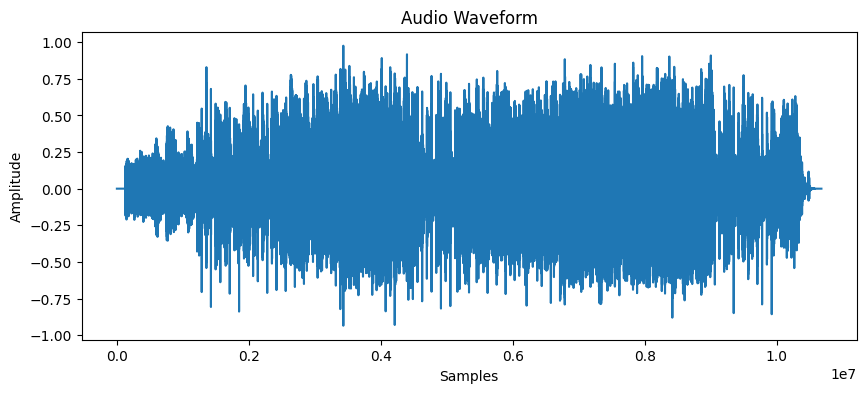

In [388]:
import matplotlib.pyplot as plt

audio_data = audio_df['Audio Data'][0]

# Plotting the audio waveform
plt.figure(figsize=(10, 4))
plt.plot(audio_data)
plt.title('Audio Waveform')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()

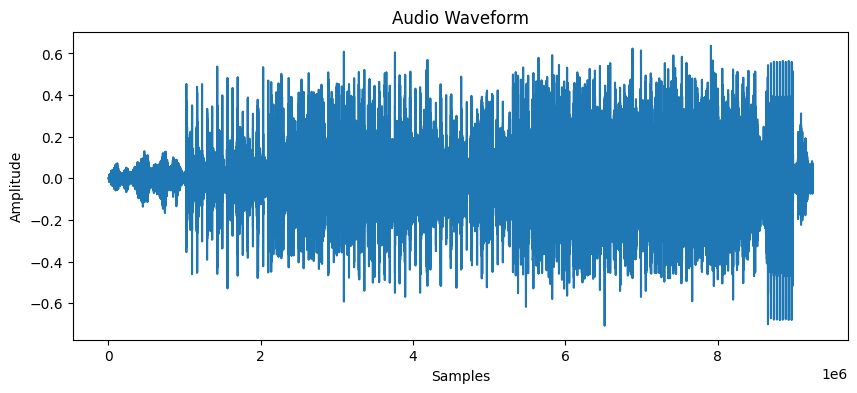

In [389]:
import matplotlib.pyplot as plt

audio_data = originals_audio_df['Audio Data'][0]

# Plotting the audio waveform
plt.figure(figsize=(10, 4))
plt.plot(audio_data)
plt.title('Audio Waveform')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()

# 3. Data pre-processing

## 3.1. Dataframe merge

In [390]:
# Merging the two dataframes on 'Song ID'
merged_df = pd.merge(audio_df, originals_audio_df, on='Song ID', suffixes=('_cover', '_original'))

# Display the first few rows of the merged dataframe
merged_df.head()

,Video ID_cover,Song ID,Audio Data_cover,Video ID_original,Audio Data_original
0,tq9nmRqNJZM,If I Ain't Got You - Alicia Keys,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Ju8Hr50Ckwk,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,ddSoLkxzxyQ,If I Ain't Got You - Alicia Keys,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Ju8Hr50Ckwk,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,YJHs_P4voBM,If I Ain't Got You - Alicia Keys,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Ju8Hr50Ckwk,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,TOgOhMWA6oM,If I Ain't Got You - Alicia Keys,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Ju8Hr50Ckwk,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,vFny_UvyT0s,If I Ain't Got You - Alicia Keys,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Ju8Hr50Ckwk,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [395]:
# Merging sentiment data with the merged dataframe on 'Video ID_cover' and 'video ID'
final_df = pd.merge(merged_df, sentiment_df, left_on='Video ID_cover', right_on='video ID')

final_df.drop(columns=['video ID'], inplace=True)

# Display the first few rows of the final dataframe
final_df.head()

,Video ID_cover,Song ID,Audio Data_cover,Video ID_original,Audio Data_original,song_id,sentiment
0,tq9nmRqNJZM,If I Ain't Got You - Alicia Keys,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Ju8Hr50Ckwk,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",If I Ain't Got You - Alicia Keys,66.99
1,ddSoLkxzxyQ,If I Ain't Got You - Alicia Keys,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Ju8Hr50Ckwk,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",If I Ain't Got You - Alicia Keys,67.12
2,YJHs_P4voBM,If I Ain't Got You - Alicia Keys,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Ju8Hr50Ckwk,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",If I Ain't Got You - Alicia Keys,77.18
3,TOgOhMWA6oM,If I Ain't Got You - Alicia Keys,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Ju8Hr50Ckwk,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",If I Ain't Got You - Alicia Keys,65.64
4,vFny_UvyT0s,If I Ain't Got You - Alicia Keys,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Ju8Hr50Ckwk,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",If I Ain't Got You - Alicia Keys,62.71


Model 1 does not one-hot-encode song ID. It's predictors are only the audio signals of the cover, and the original song.

In [191]:
# Dropping string columns from the DataFrame
model_df_no_song_id = final_df.drop(columns=['Video ID_cover', 'Video ID_original', 'Song ID', 'song_id'])

# Display the first few rows of the modified dataframe
model_df_no_song_id.head()

,Audio Data_cover,Audio Data_original,sentiment
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",66.992346
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",67.119354
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",77.178326
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",65.640917
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",62.714462


In [250]:
# FOR REPORT

# output to CSV
file_name = "./report in R/report_data.csv"
model_df_no_song_id.head(n=3).to_csv(file_name, index=False)

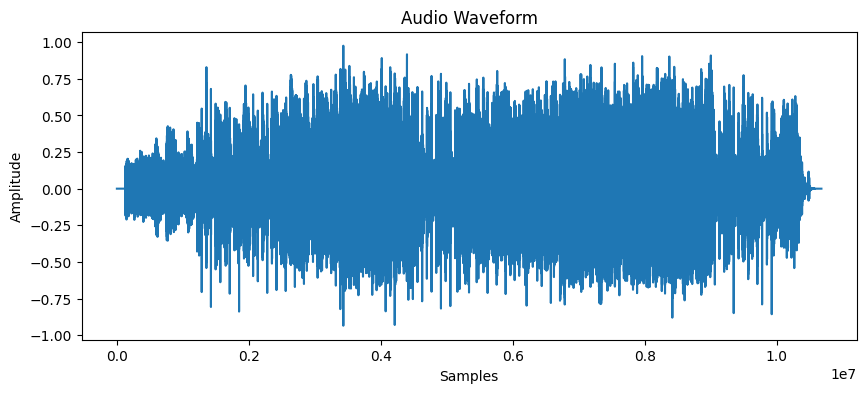

In [397]:

test = model_df_no_song_id['Audio Data_cover'][0]

# Plotting the audio waveform
plt.figure(figsize=(10, 4))
plt.plot(test)
plt.title('Audio Waveform')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()

## 3.2. Re-sampling, and Segmentation

### 3.2.1. Re-sampling and Padding

In [193]:
def segment_audio(audio, segment_length, sr):
    samples_per_segment = int(segment_length * sr)
    total_segments = int(np.ceil(len(audio) / samples_per_segment))

    print("Total number of samples in audio:", len(audio))
    print("Number of samples per segment:", samples_per_segment)
    print("Calculated total segments:", total_segments)

    segments = []
    for i in range(total_segments):
        start = i * samples_per_segment
        end = start + samples_per_segment
        segment = audio[start:end]

        print(f"Segment {i}: Start = {start}, End = {end}, Length = {len(segment)}")

        # Pad the last segment if it's shorter than the full length
        if len(segment) < samples_per_segment:
            segment = np.pad(segment, (0, samples_per_segment - len(segment)), 'constant')
            print(f"Segment {i} after padding: Length = {len(segment)}")

        segments.append(segment)

    return segments


In [164]:
# DEBUGGING

# # Example usage
# segment_length = 30  # 30 seconds
# standard_sampling_rate = 22050  # Standard sampling rate

# # Segment and resample the first audio track
# audio_cover = model_df_no_song_id['Audio Data_cover'][0]
# audio_cover_resampled = librosa.resample(audio_cover, orig_sr=44100, target_sr=standard_sampling_rate)
# segments_cover = segment_audio(audio_cover_resampled, segment_length, standard_sampling_rate)

In [165]:
# DEBUGGING

# # Example usage
# segment_length = 30  # 30 seconds
# standard_sampling_rate = 22050  # Standard sampling rate

# # Segment and resample the first original audio track
# audio_original = model_df_no_song_id['Audio Data_original'][0]
# audio_original_resampled = librosa.resample(audio_original, orig_sr=44100, target_sr=standard_sampling_rate)
# segments_original = segment_audio(audio_original_resampled, segment_length, standard_sampling_rate)


In [208]:
# Parameters for segmentation
segment_length = 30  # seconds
standard_sampling_rate = 22050  # Hz
samples_per_segment = int(segment_length * standard_sampling_rate)

# Create a zero array for replacement
zero_array = np.zeros(samples_per_segment)

# Initialize an empty list to store segmented data
segmented_data = []

# Iterate over each row in your DataFrame
for index, row in model_df_no_song_id.iterrows():
    print(f"Processing row {index}")

    # Segment cover and original audio tracks
    audio_cover = row['Audio Data_cover']
    audio_original = row['Audio Data_original']

    # Check and print if any audio data is None
    if audio_cover is None:
        print(f"Row {index}: Cover audio is None")
    if audio_original is None:
        print(f"Row {index}: Original audio is None")

    # Resample and segment audio if not None
    if audio_cover is not None:
        audio_cover_resampled = librosa.resample(audio_cover, orig_sr=44100, target_sr=standard_sampling_rate)
        segments_cover = segment_audio(audio_cover_resampled, segment_length, standard_sampling_rate)
    else:
        segments_cover = [zero_array]

    if audio_original is not None:
        audio_original_resampled = librosa.resample(audio_original, orig_sr=44100, target_sr=standard_sampling_rate)
        segments_original = segment_audio(audio_original_resampled, segment_length, standard_sampling_rate)
    else:
        segments_original = [zero_array]

    # Ensure both cover and original have the same number of segments
    max_segments = max(len(segments_cover), len(segments_original))
    print(f"Row {index}: Max segments: {max_segments}")
    
    segments_cover += [zero_array] * (max_segments - len(segments_cover))
    segments_original += [zero_array] * (max_segments - len(segments_original))

    # Add segmented data to the list
    for seg_index in range(max_segments):
        segmented_data.append({
            'Cover Segment': segments_cover[seg_index],
            'Original Segment': segments_original[seg_index],
            'Segment Index': seg_index,
            'Sentiment': row['sentiment']
        })

# Convert the list to a DataFrame
segments_df = pd.DataFrame(segmented_data)


Processing row 0
Total number of samples in audio: 5338085
Number of samples per segment: 661500
Calculated total segments: 9
Segment 0: Start = 0, End = 661500, Length = 661500
Segment 1: Start = 661500, End = 1323000, Length = 661500
Segment 2: Start = 1323000, End = 1984500, Length = 661500
Segment 3: Start = 1984500, End = 2646000, Length = 661500
Segment 4: Start = 2646000, End = 3307500, Length = 661500
Segment 5: Start = 3307500, End = 3969000, Length = 661500
Segment 6: Start = 3969000, End = 4630500, Length = 661500
Segment 7: Start = 4630500, End = 5292000, Length = 661500
Segment 8: Start = 5292000, End = 5953500, Length = 46085
Segment 8 after padding: Length = 661500
Total number of samples in audio: 4622342
Number of samples per segment: 661500
Calculated total segments: 7
Segment 0: Start = 0, End = 661500, Length = 661500
Segment 1: Start = 661500, End = 1323000, Length = 661500
Segment 2: Start = 1323000, End = 1984500, Length = 661500
Segment 3: Start = 1984500, End =

Total number of samples in audio: 4622342
Number of samples per segment: 661500
Calculated total segments: 7
Segment 0: Start = 0, End = 661500, Length = 661500
Segment 1: Start = 661500, End = 1323000, Length = 661500
Segment 2: Start = 1323000, End = 1984500, Length = 661500
Segment 3: Start = 1984500, End = 2646000, Length = 661500
Segment 4: Start = 2646000, End = 3307500, Length = 661500
Segment 5: Start = 3307500, End = 3969000, Length = 661500
Segment 6: Start = 3969000, End = 4630500, Length = 653342
Segment 6 after padding: Length = 661500
Row 8: Max segments: 8


In [392]:
segments_df.head()

,Cover Segment,Original Segment,Segment Index,Sentiment
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,66.99
1,"[0.07490128, 0.094931565, 0.0850826, 0.0915492...","[-0.00032152608, -0.00020002574, 0.010507531, ...",1,66.99
2,"[-0.040957797, -0.115433946, -0.21482903, -0.2...","[0.010473177, 0.008644883, 0.010639019, 0.0136...",2,66.99
3,"[0.118706435, 0.08983742, 0.075636685, 0.07188...","[-0.023031887, -0.042674154, -0.075315416, -0....",3,66.99
4,"[-0.3598705, -0.3553201, -0.29623574, -0.20857...","[-0.013189853, -0.0033766124, 0.0053994665, 0....",4,66.99


In [210]:
# Function to check if a segment is entirely zeros
def is_zero_array(segment):
    return np.all(segment == 0)

# Filter out rows where both segments are zero arrays
segments_df = segments_df[~((segments_df['Cover Segment'].apply(is_zero_array)) & 
                            (segments_df['Original Segment'].apply(is_zero_array)))]

# Reset index after filtering
segments_df.reset_index(drop=True, inplace=True)

Quality check

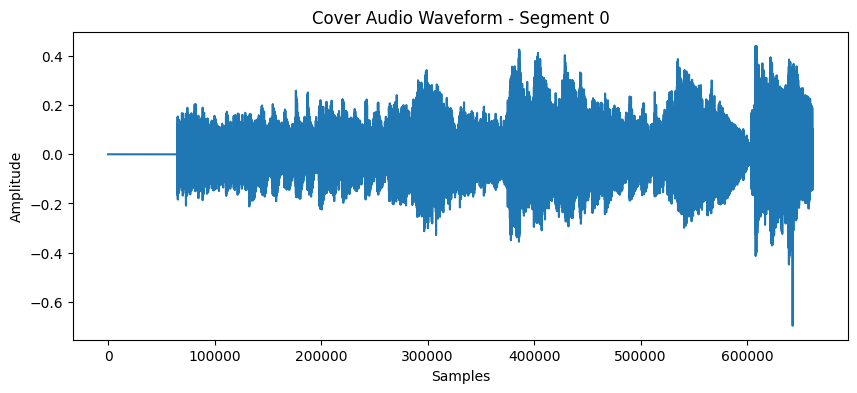

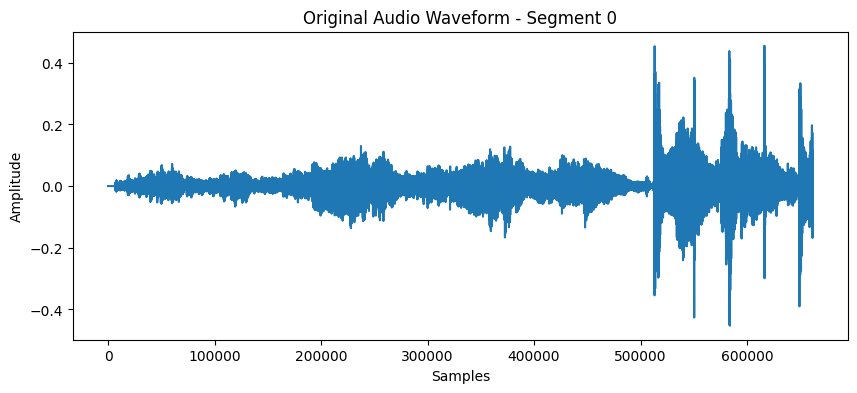

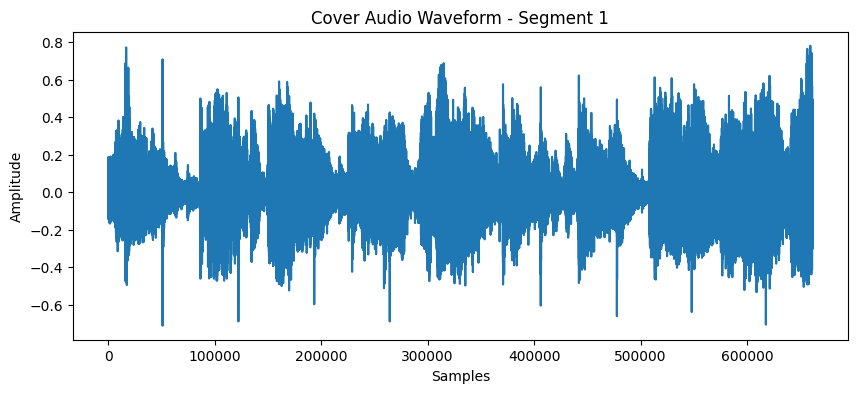

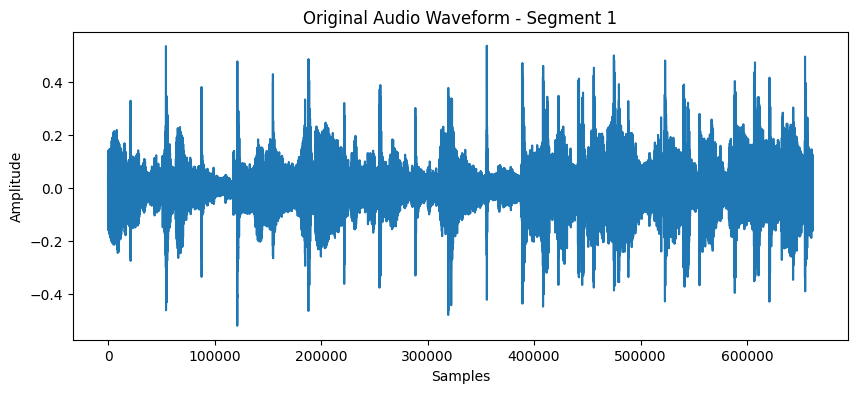

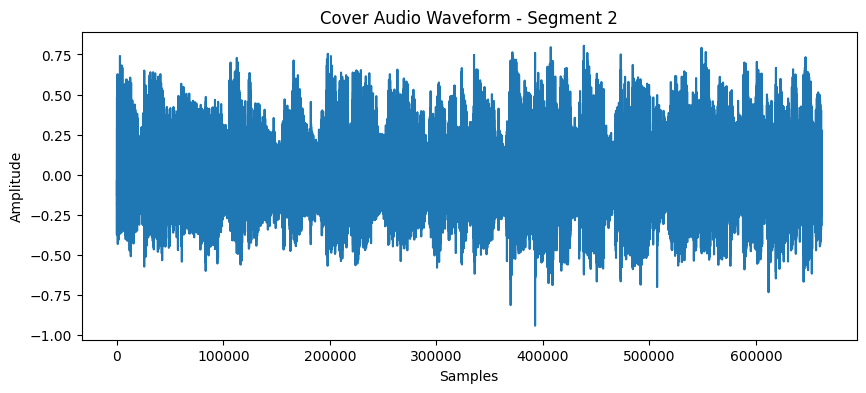

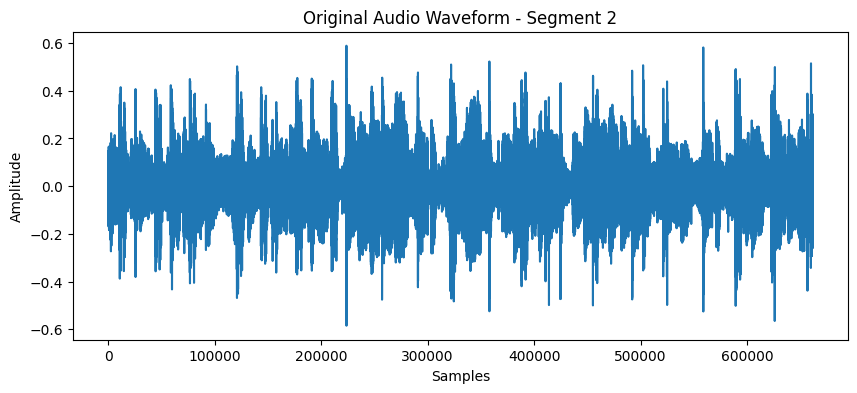

In [211]:
import matplotlib.pyplot as plt

# Number of segments to inspect
num_segments_to_inspect = 3

# Plotting the first few segments
for i in range(num_segments_to_inspect):
    # Plot Cover Segment
    plt.figure(figsize=(10, 4))
    plt.plot(segments_df['Cover Segment'].iloc[i])
    plt.title(f'Cover Audio Waveform - Segment {i}')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.show()

    # Plot Original Segment
    plt.figure(figsize=(10, 4))
    plt.plot(segments_df['Original Segment'].iloc[i])
    plt.title(f'Original Audio Waveform - Segment {i}')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.show()


In [207]:
# pretty sure this should be deleted since segmentation already handled

# # Initialize a list to store segment data
# segment_data_list = []

# for index, row in model_df_no_song_id.iterrows():
#     # Resample and segment the cover audio
#     audio_cover = row['Audio Data_cover']
#     audio_cover_resampled = librosa.resample(audio_cover, orig_sr=44100, target_sr=standard_sampling_rate)
#     segments_cover = segment_audio(audio_cover_resampled, segment_length, standard_sampling_rate)

#     # Resample and segment the original audio
#     audio_original = row['Audio Data_original']
#     audio_original_resampled = librosa.resample(audio_original, orig_sr=44100, target_sr=standard_sampling_rate)
#     segments_original = segment_audio(audio_original_resampled, segment_length, standard_sampling_rate)

#     # Append segment data to the list
#     for seg_index in range(max(len(segments_cover), len(segments_original))):
#         segment_data = {
#             'Cover Segment': segments_cover[seg_index] if seg_index < len(segments_cover) else None,
#             'Original Segment': segments_original[seg_index] if seg_index < len(segments_original) else None,
#             'Segment Index': seg_index,
#             'Sentiment': row['sentiment']
#         }
#         segment_data_list.append(segment_data)

# # Convert the list of segment data to a DataFrame
# segments_df = pd.DataFrame(segment_data_list)


In [212]:
segments_df

,Cover Segment,Original Segment,Segment Index,Sentiment
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,66.992346
1,"[0.07490128, 0.094931565, 0.0850826, 0.0915492...","[-0.00032152608, -0.00020002574, 0.010507531, ...",1,66.992346
2,"[-0.040957797, -0.115433946, -0.21482903, -0.2...","[0.010473177, 0.008644883, 0.010639019, 0.0136...",2,66.992346
3,"[0.118706435, 0.08983742, 0.075636685, 0.07188...","[-0.023031887, -0.042674154, -0.075315416, -0....",3,66.992346
4,"[-0.3598705, -0.3553201, -0.29623574, -0.20857...","[-0.013189853, -0.0033766124, 0.0053994665, 0....",4,66.992346
...,...,...,...,...
67,"[-0.49712056, -0.3406962, -0.24150649, -0.1532...","[-0.023031887, -0.042674154, -0.075315416, -0....",3,69.593073
68,"[0.008208156, -0.04071218, -0.09877376, -0.086...","[-0.013189853, -0.0033766124, 0.0053994665, 0....",4,69.593073
69,"[-0.030923821, -0.037809893, -0.041856814, -0....","[0.0883402, 0.06749987, 0.022414662, -0.023661...",5,69.593073
70,"[0.26077986, 0.39671013, 0.49544078, 0.5602351...","[0.13940172, 0.12843776, 0.10548313, 0.0852630...",6,69.593073


Quality check for 'None' values

In [213]:
# Check for None values in the original DataFrame
none_cover = segments_df['Cover Segment'].isnull().sum()
none_original = segments_df['Original Segment'].isnull().sum()

print("None values in 'Audio Data_cover':", none_cover)
print("None values in 'Audio Data_original':", none_original)


None values in 'Audio Data_cover': 0
None values in 'Audio Data_original': 0


Quality check zeroed segments at the end of data frame

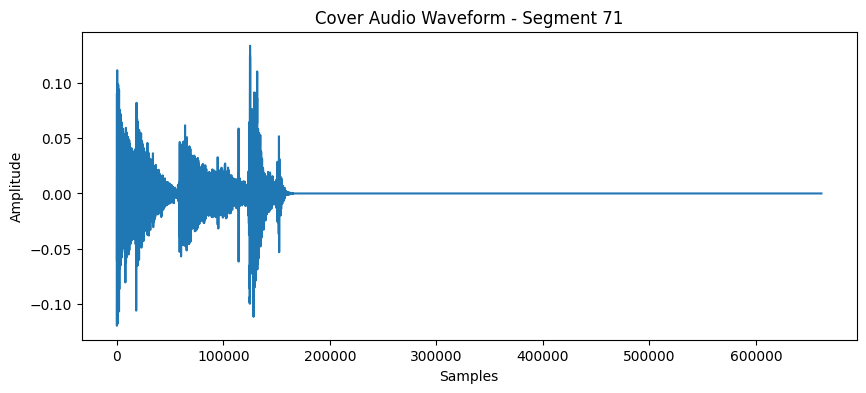

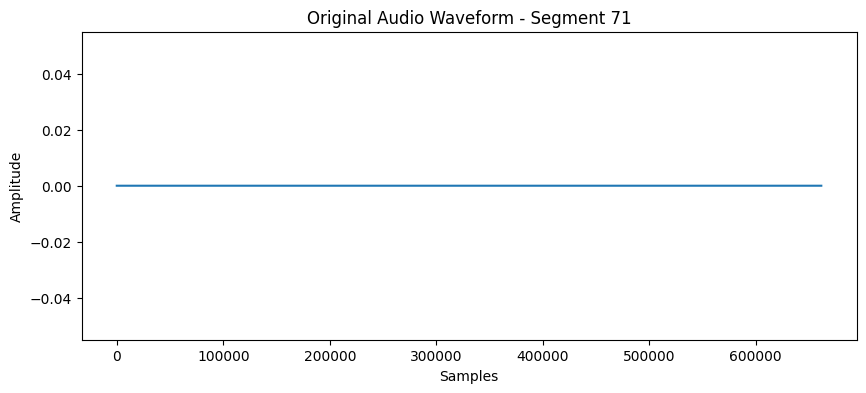

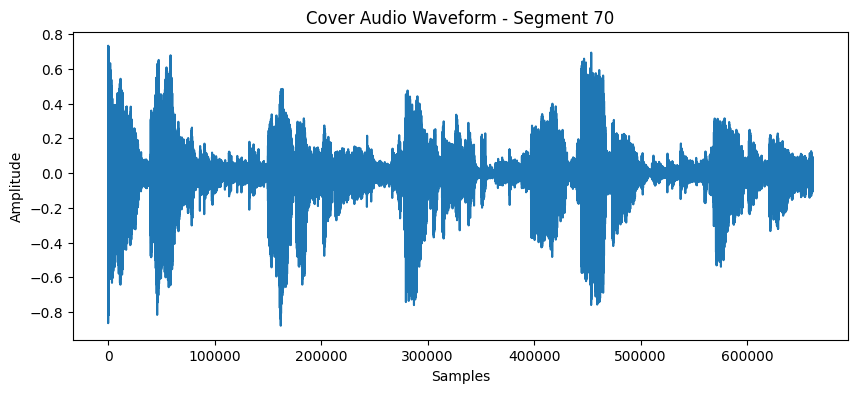

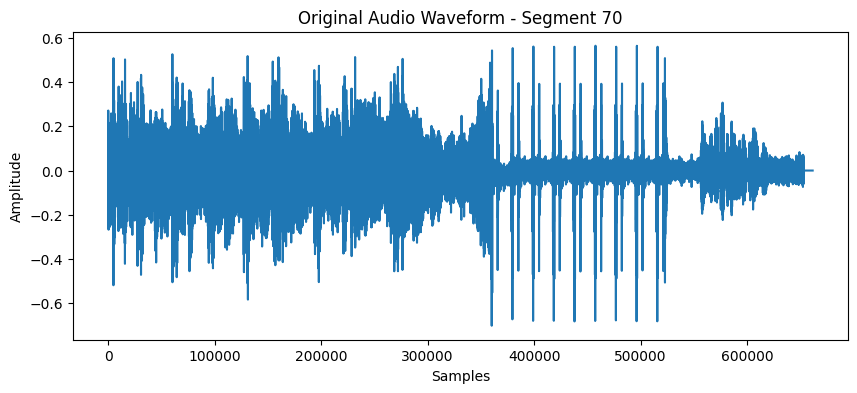

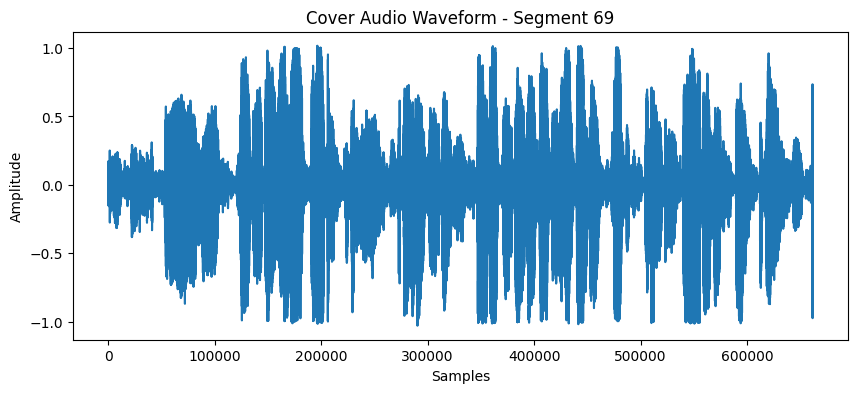

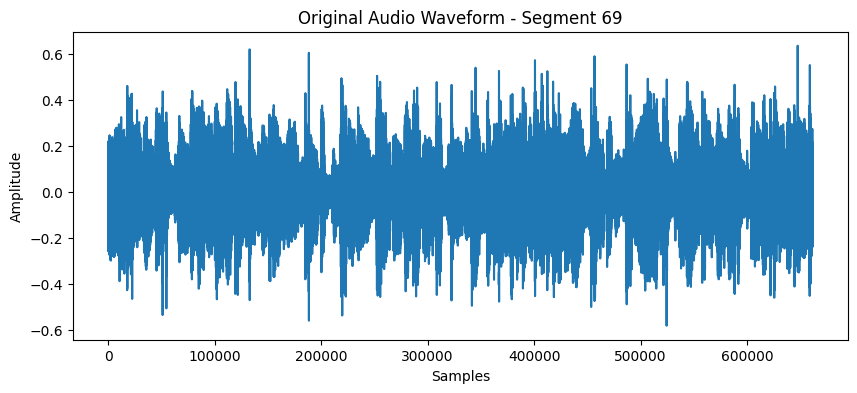

In [214]:
# Number of segments to inspect from the end of the DataFrame
num_segments_to_inspect = 3

# Total number of segments in the DataFrame
total_segments = len(segments_df)

# Plotting the last few segments
for i in range(1, num_segments_to_inspect + 1):
    segment_index = total_segments - i

    # Plot Cover Segment
    plt.figure(figsize=(10, 4))
    plt.plot(segments_df['Cover Segment'].iloc[segment_index])
    plt.title(f'Cover Audio Waveform - Segment {segment_index}')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.show()

    # Plot Original Segment
    plt.figure(figsize=(10, 4))
    plt.plot(segments_df['Original Segment'].iloc[segment_index])
    plt.title(f'Original Audio Waveform - Segment {segment_index}')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.show()

#!pip install librosa

Quality check

In [170]:
# DEBUGGING

# # Filter and display rows where either Cover Segment or Original Segment is None
# none_rows = segments_df[(segments_df['Cover Segment'].isnull()) | (segments_df['Original Segment'].isnull())]
# none_rows

Quality check

### 3.2.2. Normalization

In [136]:
# working, but no longer needed

# # Apply normalization to the processed audio data
# model_df_no_song_id['Normalized Audio Data_cover'] = model_df_no_song_id['Processed Audio Data_cover'].apply(librosa.util.normalize)
# model_df_no_song_id['Normalized Audio Data_original'] = model_df_no_song_id['Processed Audio Data_original'].apply(librosa.util.normalize)

Quality check

In [137]:
# test3 = model_df_no_song_id['Normalized Audio Data_cover'][0]

# # Plotting the audio waveform
# plt.figure(figsize=(10, 4))
# plt.plot(test3)
# plt.title('Audio Waveform')
# plt.xlabel('Samples')
# plt.ylabel('Amplitude')
# plt.show()

# test3 = model_df_no_song_id['Normalized Audio Data_original'][0]

# # Plotting the audio waveform
# plt.figure(figsize=(10, 4))
# plt.plot(test3)
# plt.title('Audio Waveform')
# plt.xlabel('Samples')
# plt.ylabel('Amplitude')
# plt.show()

Finally, drop the original columns, and only keep the processed ones

In [138]:
# working but no longer needed

# # Keep only the relevant columns
# model_df_updated = model_df_no_song_id[['Normalized Audio Data_cover', 'Normalized Audio Data_original', 'sentiment']]

# # Display the first few rows of the updated dataframe
# model_df_updated.head()

Save dataframe into a CSV dataset. This will be common dataset for the models (MFCC, Chroma, etc.)

In [268]:
segments_df.head()

,Cover Segment,Original Segment,Segment Index,Sentiment
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,66.992346
1,"[0.07490128, 0.094931565, 0.0850826, 0.0915492...","[-0.00032152608, -0.00020002574, 0.010507531, ...",1,66.992346
2,"[-0.040957797, -0.115433946, -0.21482903, -0.2...","[0.010473177, 0.008644883, 0.010639019, 0.0136...",2,66.992346
3,"[0.118706435, 0.08983742, 0.075636685, 0.07188...","[-0.023031887, -0.042674154, -0.075315416, -0....",3,66.992346
4,"[-0.3598705, -0.3553201, -0.29623574, -0.20857...","[-0.013189853, -0.0033766124, 0.0053994665, 0....",4,66.992346


In [271]:
type(segments_df['Cover Segment'][0])

numpy.ndarray

In [269]:
# Save the DataFrame as a CSV file
output_file_path = './data/pre-processed/data-segments.csv'
segments_df.to_csv(output_file_path, index=False)

In [393]:
# import pandas as pd

# file_name = "./data/pre-processed/data-segments.parquet"

# # Save the DataFrame as a Parquet file
# segments_df.to_parquet(file_name, index=False)

# 4. Feature Extraction

## 4.1. Mel-Frequency Cepstral Coefficents 

Use 2D MFCC for exploratory work

In [140]:
# # Creating a separate DataFrame for MFCC feature extraction
# mfcc_df = model_df_updated.copy()

# def extract_mfccs_2d(audio, sr=22050, n_mfcc=13):
#     mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
#     return mfccs

# # Extract 2D MFCCs
# mfcc_df['MFCCs_cover_2D'] = mfcc_df['Normalized Audio Data_cover'].apply(lambda x: extract_mfccs_2d(x))
# mfcc_df['MFCCs_original_2D'] = mfcc_df['Normalized Audio Data_original'].apply(lambda x: extract_mfccs_2d(x))

In [141]:
# def plot_mfccs(mfccs, title):
#     plt.figure(figsize=(10, 4))
#     librosa.display.specshow(mfccs, x_axis='time', sr=22050)
#     plt.colorbar(format='%+2.0f dB')
#     plt.title(title)
#     plt.tight_layout()
#     plt.show()

# # Plotting MFCCs for a cover and original song
# sample_index = 0  # Change this to look at different samples
# plot_mfccs(mfcc_df['MFCCs_cover_2D'].iloc[sample_index], 'MFCCs - Cover Song')
# plot_mfccs(mfcc_df['MFCCs_original_2D'].iloc[sample_index], 'MFCCs - Original Song')

In [215]:
import numpy as np
import librosa

def extract_mfccs(audio, sr=22050, n_mfcc=13):
    # Compute MFCCs
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
    mfccs_mean = np.mean(mfccs, axis=1)
    return mfccs_mean

In [216]:
# Create a copy of the DataFrame for MFCC features
mfcc_df = segments_df.copy()

# Apply the function to extract MFCCs for cover and original segments
mfcc_df['MFCCs_cover'] = mfcc_df['Cover Segment'].apply(lambda x: extract_mfccs(x, sr=standard_sampling_rate))
mfcc_df['MFCCs_original'] = mfcc_df['Original Segment'].apply(lambda x: extract_mfccs(x, sr=standard_sampling_rate))

In [394]:
mfcc_df.head()

,Cover Segment,Original Segment,Segment Index,Sentiment,MFCCs_cover,MFCCs_original,Combined_MFCCs
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,66.99,"[-280.62973, 137.57768, -15.750442, 13.012977,...","[-373.91782, 124.56982, 14.792246, 14.727049, ...","[-280.62973, 137.57768, -15.750442, 13.012977,..."
1,"[0.07490128, 0.094931565, 0.0850826, 0.0915492...","[-0.00032152608, -0.00020002574, 0.010507531, ...",1,66.99,"[-154.8214, 93.95682, 18.159136, 15.8184395, 1...","[-241.28488, 111.67336, 12.057023, 30.057566, ...","[-154.8214, 93.95682, 18.159136, 15.8184395, 1..."
2,"[-0.040957797, -0.115433946, -0.21482903, -0.2...","[0.010473177, 0.008644883, 0.010639019, 0.0136...",2,66.99,"[-97.48313, 93.2193, 5.0291147, 19.118996, 18....","[-197.54187, 110.080154, 3.3418362, 28.23284, ...","[-97.48313, 93.2193, 5.0291147, 19.118996, 18...."
3,"[0.118706435, 0.08983742, 0.075636685, 0.07188...","[-0.023031887, -0.042674154, -0.075315416, -0....",3,66.99,"[-126.1172, 87.86554, 11.154273, 20.830564, 14...","[-213.45404, 114.208145, 4.807824, 31.426464, ...","[-126.1172, 87.86554, 11.154273, 20.830564, 14..."
4,"[-0.3598705, -0.3553201, -0.29623574, -0.20857...","[-0.013189853, -0.0033766124, 0.0053994665, 0....",4,66.99,"[-101.078125, 92.66968, 14.0097475, 26.34912, ...","[-150.5472, 113.78316, -6.397619, 29.234081, 6...","[-101.078125, 92.66968, 14.0097475, 26.34912, ..."


Quality checks

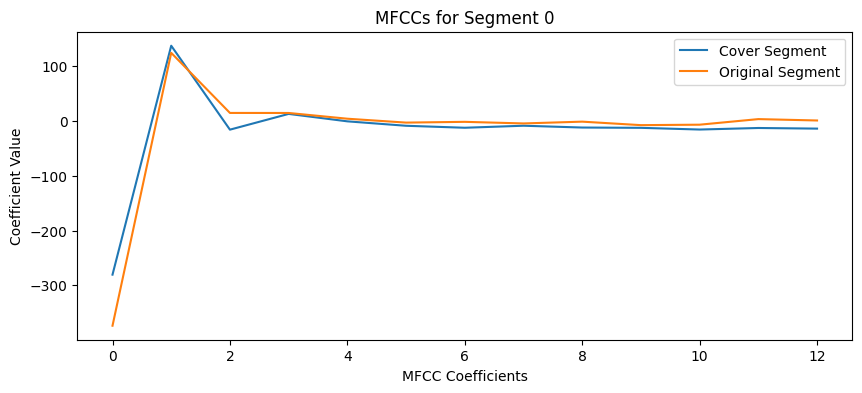

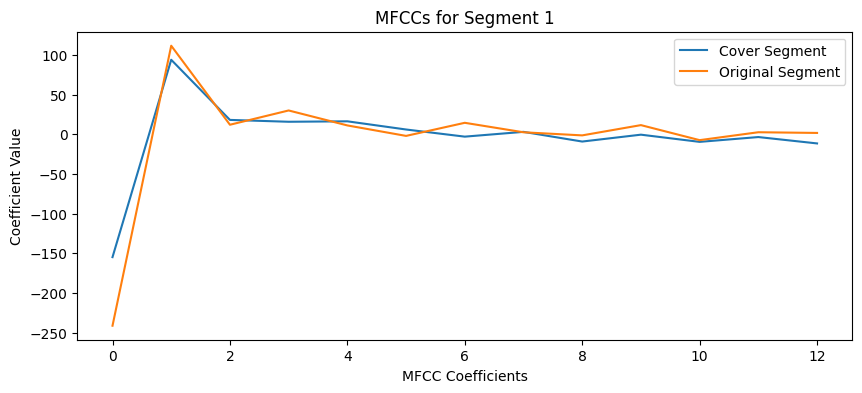

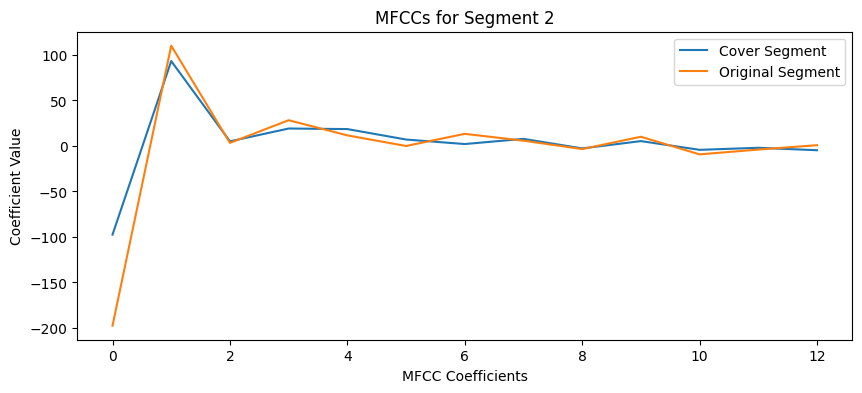

In [260]:
import matplotlib.pyplot as plt

# Number of segments to visualize
num_segments_to_visualize = 3

# Iterate through the segments
for i in range(num_segments_to_visualize):
    # Create a new figure for each segment
    plt.figure(figsize=(10, 4))

    # Plot MFCCs for Cover Segment
    plt.plot(mfcc_df['MFCCs_cover'].iloc[i], label='Cover Segment')
    
    # Plot MFCCs for Original Segment on the same plot
    plt.plot(mfcc_df['MFCCs_original'].iloc[i], label='Original Segment')

    # Add labels and legend
    plt.title(f'MFCCs for Segment {i}')
    plt.xlabel('MFCC Coefficients')
    plt.ylabel('Coefficient Value')
    plt.legend()

    # Save the plot as a PNG file
    if i == 2:
        plt.savefig(f'../Final Report/mfcc-segment-{i}.png')
    
    # Show the plot
    plt.show()

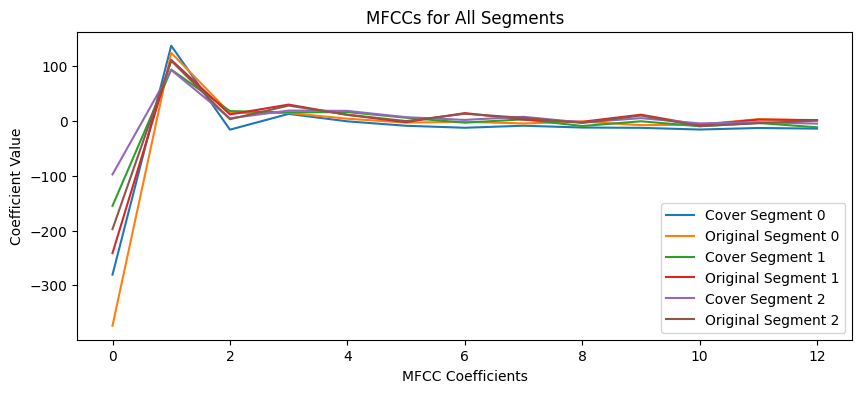

In [262]:
import matplotlib.pyplot as plt

# Number of segments to visualize
num_segments_to_visualize = 3

# Create a new figure
plt.figure(figsize=(10, 4))

# Iterate through the segments
for i in range(num_segments_to_visualize):
    # Plot MFCCs for Cover Segment
    plt.plot(mfcc_df['MFCCs_cover'].iloc[i], label=f'Cover Segment {i}')
    
    # Plot MFCCs for Original Segment
    plt.plot(mfcc_df['MFCCs_original'].iloc[i], label=f'Original Segment {i}')

# Add labels and legend
plt.title('MFCCs for All Segments')
plt.xlabel('MFCC Coefficients')
plt.ylabel('Coefficient Value')
plt.legend()

# Save the plot as a PNG file
plt.savefig('../Final Report/mfcc-all-segments.png')

# Show the plot
plt.show()


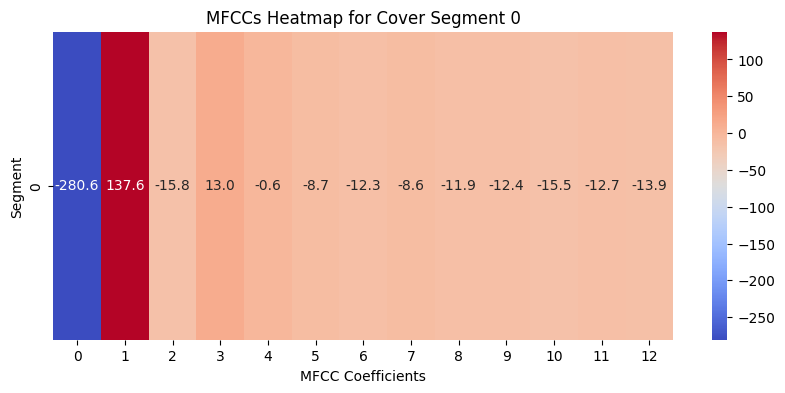

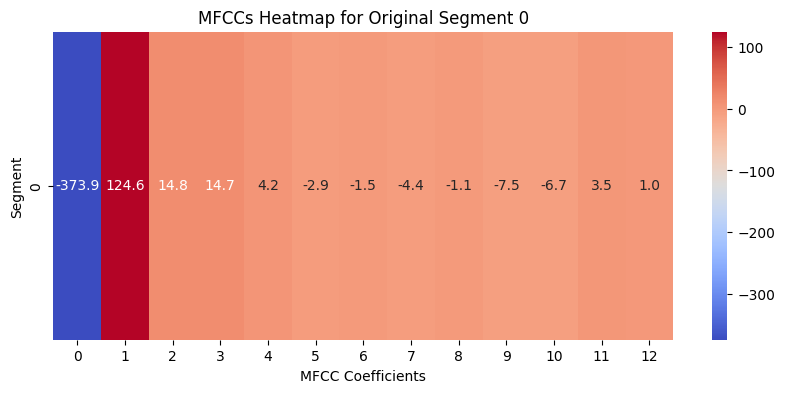

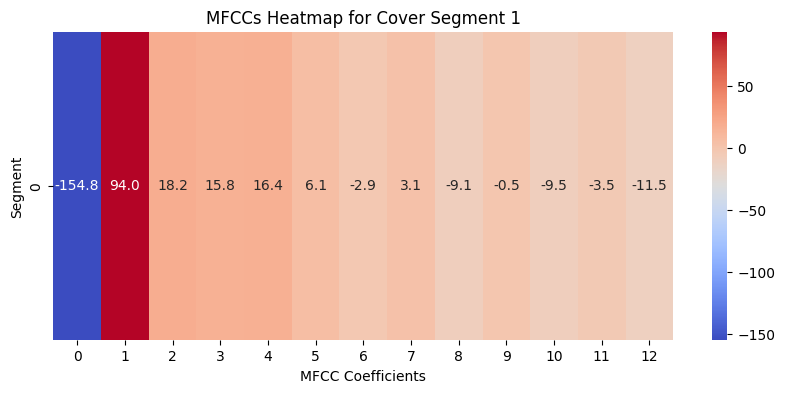

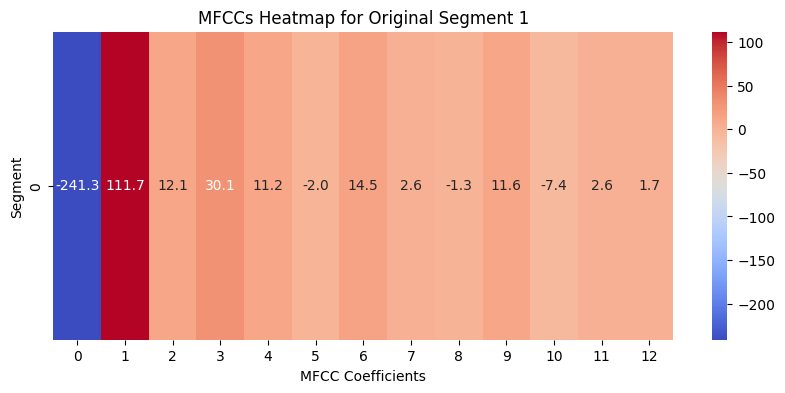

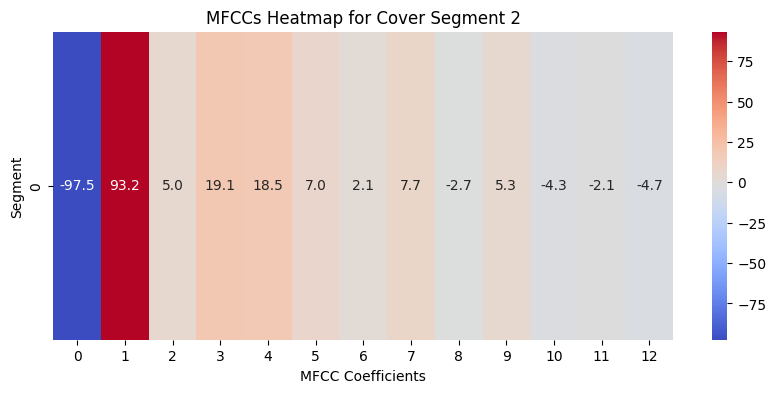

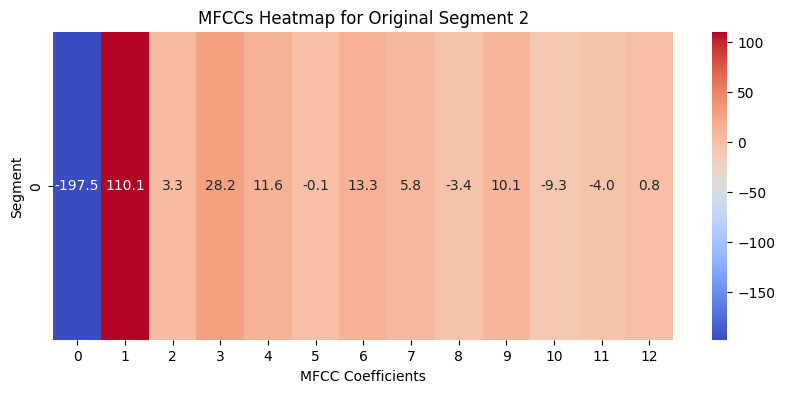

In [174]:
import seaborn as sns

# Visualize MFCCs as a heatmap for the first few segments
for i in range(num_segments_to_visualize):
    plt.figure(figsize=(10, 4))
    sns.heatmap([mfcc_df['MFCCs_cover'].iloc[i]], annot=True, fmt=".1f", cmap='coolwarm')
    plt.title(f'MFCCs Heatmap for Cover Segment {i}')
    plt.xlabel('MFCC Coefficients')
    plt.ylabel('Segment')
    plt.show()

    plt.figure(figsize=(10, 4))
    sns.heatmap([mfcc_df['MFCCs_original'].iloc[i]], annot=True, fmt=".1f", cmap='coolwarm')
    plt.title(f'MFCCs Heatmap for Original Segment {i}')
    plt.xlabel('MFCC Coefficients')
    plt.ylabel('Segment')
    plt.show()

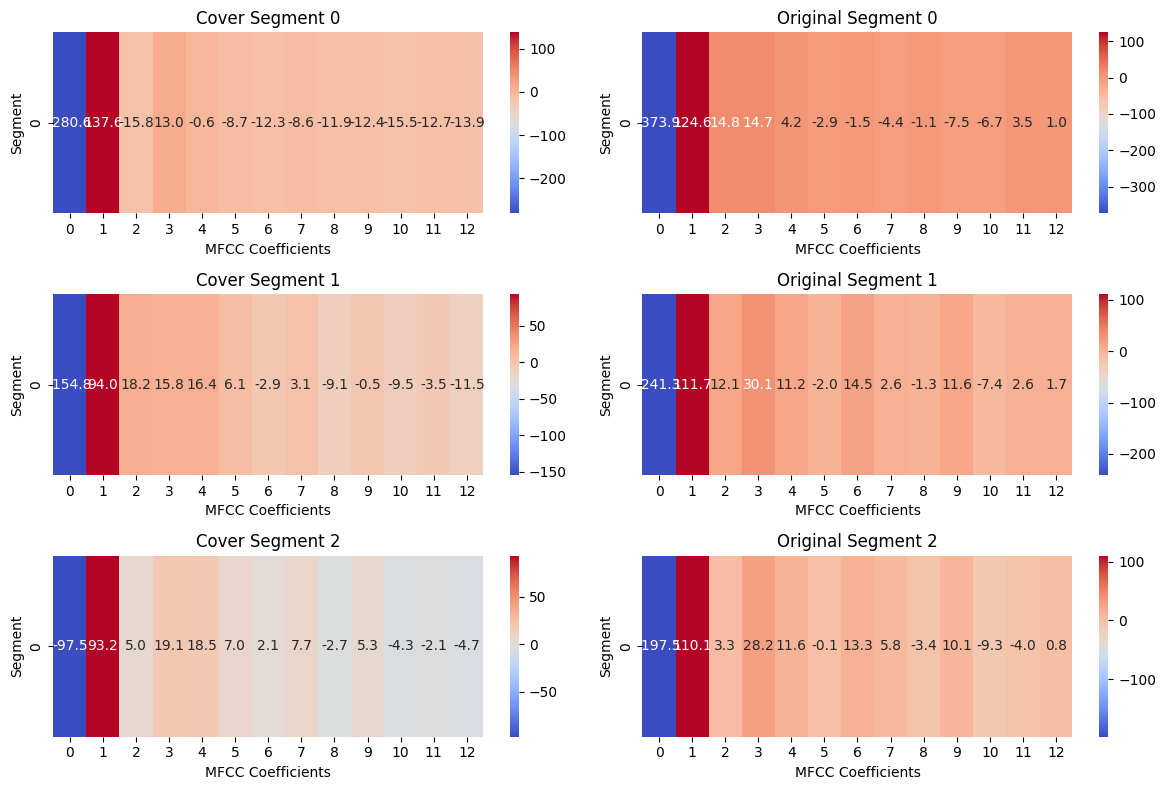

In [266]:
import seaborn as sns
import matplotlib.pyplot as plt

# Number of segments to visualize
num_segments_to_visualize = 3

# Create a grid of subplots
fig, axes = plt.subplots(num_segments_to_visualize, 2, figsize=(12, 8))

for i in range(num_segments_to_visualize):
    # Plot MFCCs Heatmap for Cover Segment
    sns.heatmap([mfcc_df['MFCCs_cover'].iloc[i]], annot=True, fmt=".1f", cmap='coolwarm', ax=axes[i, 0])
    axes[i, 0].set_title(f'Cover Segment {i}')
    axes[i, 0].set_xlabel('MFCC Coefficients')
    axes[i, 0].set_ylabel('Segment')
    
    # Plot MFCCs Heatmap for Original Segment
    sns.heatmap([mfcc_df['MFCCs_original'].iloc[i]], annot=True, fmt=".1f", cmap='coolwarm', ax=axes[i, 1])
    axes[i, 1].set_title(f'Original Segment {i}')
    axes[i, 1].set_xlabel('MFCC Coefficients')
    axes[i, 1].set_ylabel('Segment')

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('../Final Report/mfcc-heat-map.png')

# Show the subplots
plt.show()


In [222]:
mfcc_df

,Cover Segment,Original Segment,Segment Index,Sentiment,MFCCs_cover,MFCCs_original,Combined_MFCCs
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,66.992346,"[-280.62973, 137.57768, -15.750442, 13.012977,...","[-373.91782, 124.56982, 14.792246, 14.727049, ...","[-280.62973, 137.57768, -15.750442, 13.012977,..."
1,"[0.07490128, 0.094931565, 0.0850826, 0.0915492...","[-0.00032152608, -0.00020002574, 0.010507531, ...",1,66.992346,"[-154.8214, 93.95682, 18.159136, 15.8184395, 1...","[-241.28488, 111.67336, 12.057023, 30.057566, ...","[-154.8214, 93.95682, 18.159136, 15.8184395, 1..."
2,"[-0.040957797, -0.115433946, -0.21482903, -0.2...","[0.010473177, 0.008644883, 0.010639019, 0.0136...",2,66.992346,"[-97.48313, 93.2193, 5.0291147, 19.118996, 18....","[-197.54187, 110.080154, 3.3418362, 28.23284, ...","[-97.48313, 93.2193, 5.0291147, 19.118996, 18...."
3,"[0.118706435, 0.08983742, 0.075636685, 0.07188...","[-0.023031887, -0.042674154, -0.075315416, -0....",3,66.992346,"[-126.1172, 87.86554, 11.154273, 20.830564, 14...","[-213.45404, 114.208145, 4.807824, 31.426464, ...","[-126.1172, 87.86554, 11.154273, 20.830564, 14..."
4,"[-0.3598705, -0.3553201, -0.29623574, -0.20857...","[-0.013189853, -0.0033766124, 0.0053994665, 0....",4,66.992346,"[-101.078125, 92.66968, 14.0097475, 26.34912, ...","[-150.5472, 113.78316, -6.397619, 29.234081, 6...","[-101.078125, 92.66968, 14.0097475, 26.34912, ..."
...,...,...,...,...,...,...,...
67,"[-0.49712056, -0.3406962, -0.24150649, -0.1532...","[-0.023031887, -0.042674154, -0.075315416, -0....",3,69.593073,"[-206.86069, 99.477715, -2.0666633, 17.460072,...","[-213.45404, 114.208145, 4.807824, 31.426464, ...","[-206.86069, 99.477715, -2.0666633, 17.460072,..."
68,"[0.008208156, -0.04071218, -0.09877376, -0.086...","[-0.013189853, -0.0033766124, 0.0053994665, 0....",4,69.593073,"[-208.75859, 107.512405, 4.916669, 27.059998, ...","[-150.5472, 113.78316, -6.397619, 29.234081, 6...","[-208.75859, 107.512405, 4.916669, 27.059998, ..."
69,"[-0.030923821, -0.037809893, -0.041856814, -0....","[0.0883402, 0.06749987, 0.022414662, -0.023661...",5,69.593073,"[-146.47227, 83.42663, -18.152473, 22.553183, ...","[-139.42027, 100.97849, -7.7002287, 30.234015,...","[-146.47227, 83.42663, -18.152473, 22.553183, ..."
70,"[0.26077986, 0.39671013, 0.49544078, 0.5602351...","[0.13940172, 0.12843776, 0.10548313, 0.0852630...",6,69.593073,"[-255.13557, 117.71319, 8.989476, 16.494682, 1...","[-248.08727, 107.67671, 13.659662, 37.194458, ...","[-255.13557, 117.71319, 8.989476, 16.494682, 1..."


## 4.2. Chroma Features

In [279]:
import numpy as np
import librosa

def extract_chroma_features(segment, sr=22050, hop_length=512):
    # Extract chroma features
    chroma = librosa.feature.chroma_stft(y=segment, sr=sr, hop_length=hop_length)
    # Aggregate across time
    chroma_agg = np.mean(chroma, axis=1)
    return chroma_agg

In [280]:
# Create a copy of the DataFrame for Chroma features
chroma_df = segments_df.copy()

# Apply the function to extract Chroma features for cover and original segments
chroma_df['Chroma_cover'] = chroma_df['Cover Segment'].apply(extract_chroma_features)
chroma_df['Chroma_original'] = chroma_df['Original Segment'].apply(extract_chroma_features)

/Users/imacaristorenas/anaconda3/lib/python3.10/site-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
/Users/imacaristorenas/anaconda3/lib/python3.10/site-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


In [283]:
chroma_df.head(n=5)

,Cover Segment,Original Segment,Segment Index,Sentiment,Chroma_cover,Chroma_original
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,66.992346,"[0.23668525, 0.15228982, 0.19948675, 0.1768509...","[0.3423872, 0.15875158, 0.19772927, 0.19595106..."
1,"[0.07490128, 0.094931565, 0.0850826, 0.0915492...","[-0.00032152608, -0.00020002574, 0.010507531, ...",1,66.992346,"[0.2807065, 0.21876179, 0.30386704, 0.3224849,...","[0.36885595, 0.33058733, 0.39120206, 0.2904734..."
2,"[-0.040957797, -0.115433946, -0.21482903, -0.2...","[0.010473177, 0.008644883, 0.010639019, 0.0136...",2,66.992346,"[0.2087211, 0.18079829, 0.28280213, 0.36531958...","[0.38075903, 0.26757538, 0.2936048, 0.21348177..."
3,"[0.118706435, 0.08983742, 0.075636685, 0.07188...","[-0.023031887, -0.042674154, -0.075315416, -0....",3,66.992346,"[0.312157, 0.2535302, 0.364836, 0.38762218, 0....","[0.31160274, 0.26799, 0.34859195, 0.34064043, ..."
4,"[-0.3598705, -0.3553201, -0.29623574, -0.20857...","[-0.013189853, -0.0033766124, 0.0053994665, 0....",4,66.992346,"[0.21091183, 0.1794728, 0.27993333, 0.31757006...","[0.45216635, 0.30834115, 0.33905834, 0.2383734..."


Quality Check

In [288]:
# import matplotlib.pyplot as plt

# # Number of segments to visualize
# num_segments_to_visualize = 3

# # Visualize Chroma features for the first few segments
# for i in range(num_segments_to_visualize):
#     # Plot Chroma for Cover Segment
#     plt.figure(figsize=(10, 4))
#     plt.bar(range(1, 13), chroma_df['Chroma_cover'].iloc[i], label='Cover Segment')
#     plt.bar(range(1, 13), chroma_df['Chroma_original'].iloc[i], alpha=0.5, label='Original Segment')
#     plt.title(f'Chroma Features for Segment {i}')
#     plt.xlabel('Chroma Bin')
#     plt.ylabel('Average Intensity')
#     plt.legend()
#     plt.show()


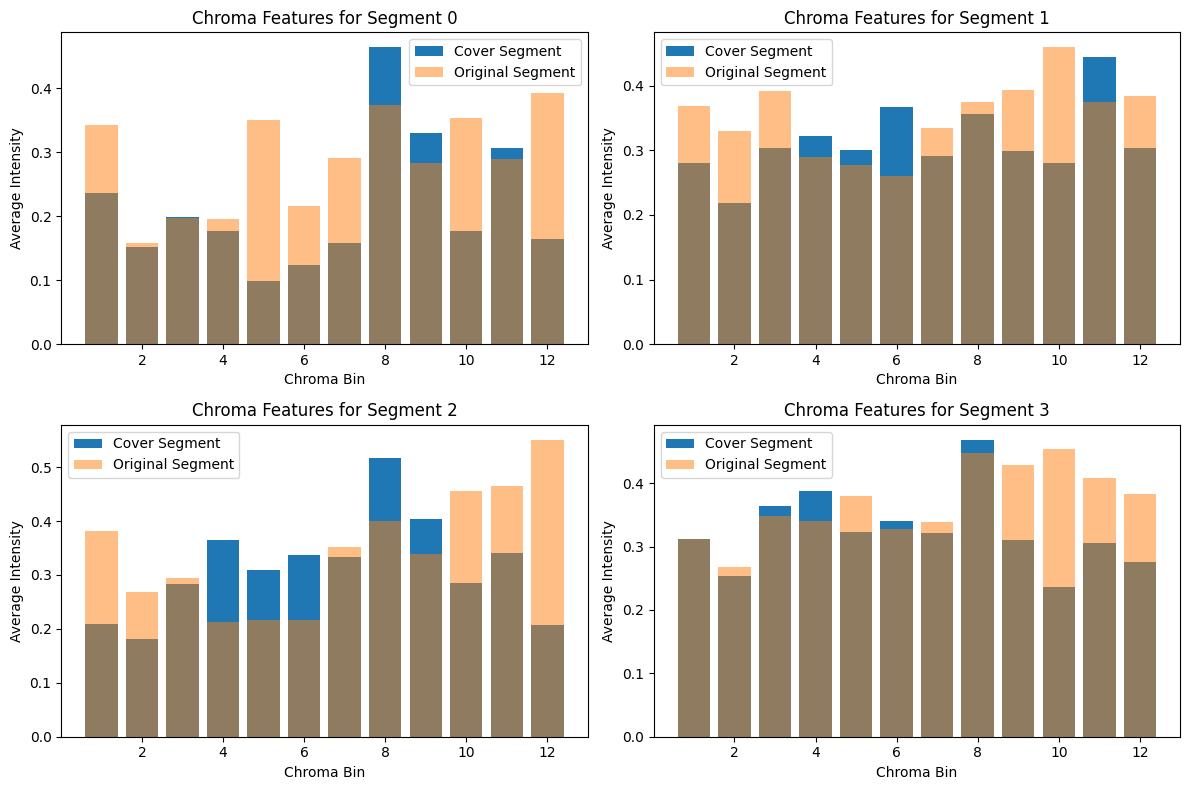

In [291]:
import matplotlib.pyplot as plt

# Number of segments to visualize
num_segments_to_visualize = 4

# Create a grid of subplots (2 rows and 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for i in range(num_segments_to_visualize):
    # Calculate subplot position (row and column)
    row = i // 2
    col = i % 2
    
    # Plot Chroma for Cover Segment in the appropriate subplot
    ax = axes[row, col]
    ax.bar(range(1, 13), chroma_df['Chroma_cover'].iloc[i], label='Cover Segment')
    ax.bar(range(1, 13), chroma_df['Chroma_original'].iloc[i], alpha=0.5, label='Original Segment')
    ax.set_title(f'Chroma Features for Segment {i}')
    ax.set_xlabel('Chroma Bin')
    ax.set_ylabel('Average Intensity')
    ax.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('../Final Report/chroma-features.png')

# Show the subplots (optional)
plt.show()


## 4.3. Spectral Features

In [307]:
import numpy as np
import librosa

def extract_spectral_contrast(segment, sr=22050):
    # Extract spectral contrast
    spectral_contrast = librosa.feature.spectral_contrast(y=segment, sr=sr)
    # Aggregate across time
    spectral_contrast_agg = np.mean(spectral_contrast, axis=1)
    return spectral_contrast_agg

In [308]:
# Create a copy of the DataFrame for Spectral Contrast features
spectral_df = segments_df.copy()

# Apply the function to extract Spectral Contrast features for cover and original segments
spectral_df['SpectralContrast_cover'] = spectral_df['Cover Segment'].apply(lambda x: extract_spectral_contrast(x, sr=standard_sampling_rate))
spectral_df['SpectralContrast_original'] = spectral_df['Original Segment'].apply(lambda x: extract_spectral_contrast(x, sr=standard_sampling_rate))

In [309]:
spectral_df.head(n=5)

,Cover Segment,Original Segment,Segment Index,Sentiment,SpectralContrast_cover,SpectralContrast_original
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,66.992346,"[22.51160447457715, 20.142055876154327, 24.440...","[20.764842602590864, 20.686302338830156, 22.90..."
1,"[0.07490128, 0.094931565, 0.0850826, 0.0915492...","[-0.00032152608, -0.00020002574, 0.010507531, ...",1,66.992346,"[23.07200903689596, 19.284440831905993, 22.471...","[26.06591982281666, 18.978247081388837, 20.680..."
2,"[-0.040957797, -0.115433946, -0.21482903, -0.2...","[0.010473177, 0.008644883, 0.010639019, 0.0136...",2,66.992346,"[22.996394170280965, 18.121181334668837, 23.74...","[25.84705658500992, 17.630441780485892, 20.914..."
3,"[0.118706435, 0.08983742, 0.075636685, 0.07188...","[-0.023031887, -0.042674154, -0.075315416, -0....",3,66.992346,"[20.96706257038996, 17.927834351672026, 22.453...","[26.232458291506834, 16.525432966619444, 20.40..."
4,"[-0.3598705, -0.3553201, -0.29623574, -0.20857...","[-0.013189853, -0.0033766124, 0.0053994665, 0....",4,66.992346,"[21.95356115712459, 17.650172697235572, 23.321...","[26.19940449183436, 16.19245330152493, 19.3464..."


Quality Check

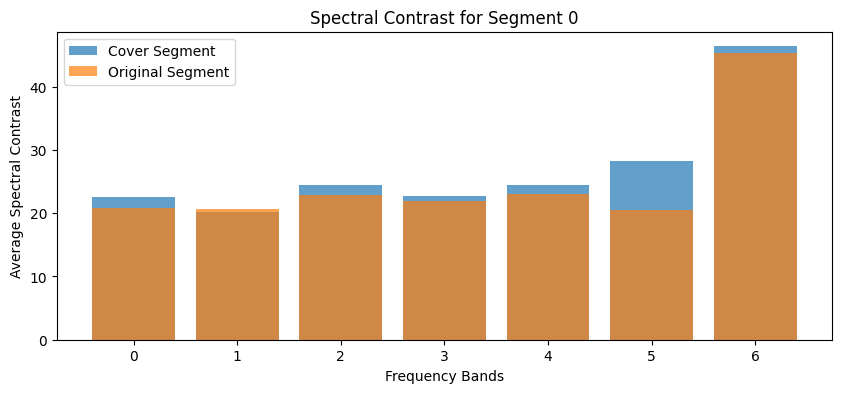

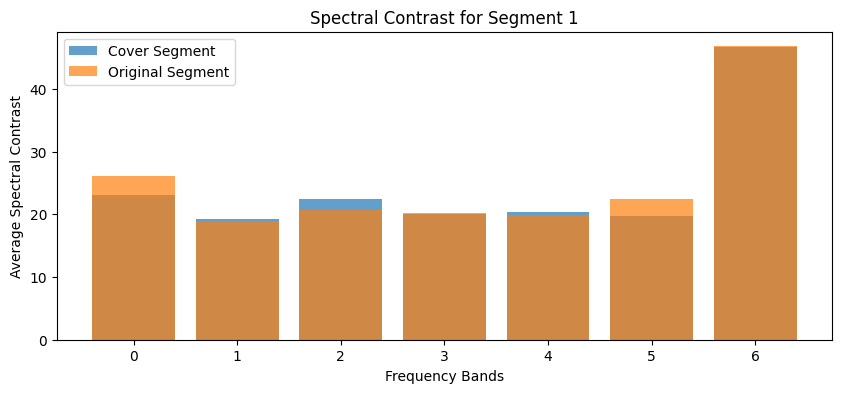

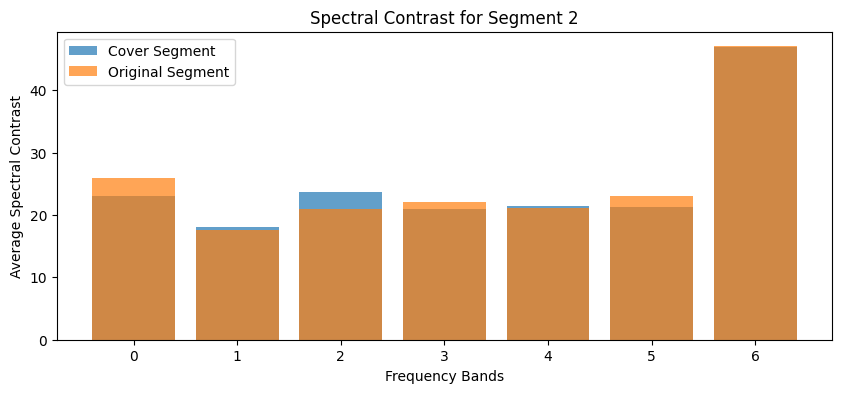

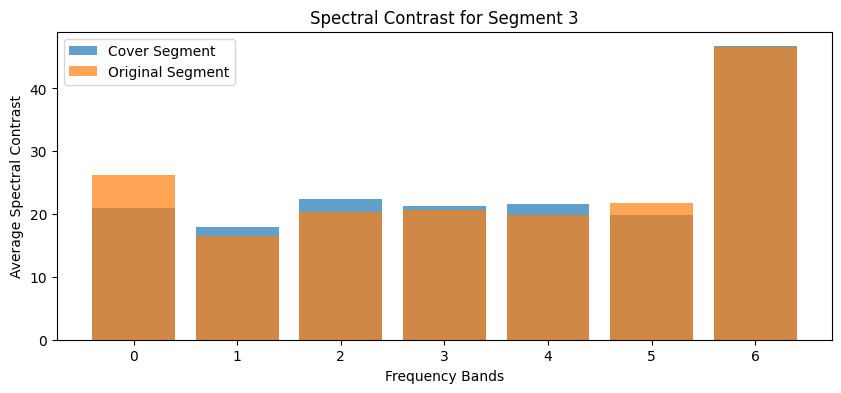

In [311]:
import matplotlib.pyplot as plt

# Number of segments to visualize
num_segments_to_visualize = 4

# Visualize Spectral Contrast for the first few segments
for i in range(num_segments_to_visualize):
    # Plot Spectral Contrast for Cover Segment
    plt.figure(figsize=(10, 4))
    plt.bar(range(len(spectral_df['SpectralContrast_cover'].iloc[i])), spectral_df['SpectralContrast_cover'].iloc[i], label='Cover Segment', alpha=0.7)
    plt.bar(range(len(spectral_df['SpectralContrast_original'].iloc[i])), spectral_df['SpectralContrast_original'].iloc[i], label='Original Segment', alpha=0.7)
    plt.title(f'Spectral Contrast for Segment {i}')
    plt.xlabel('Frequency Bands')
    plt.ylabel('Average Spectral Contrast')
    plt.legend()
    plt.show()

Plot for report

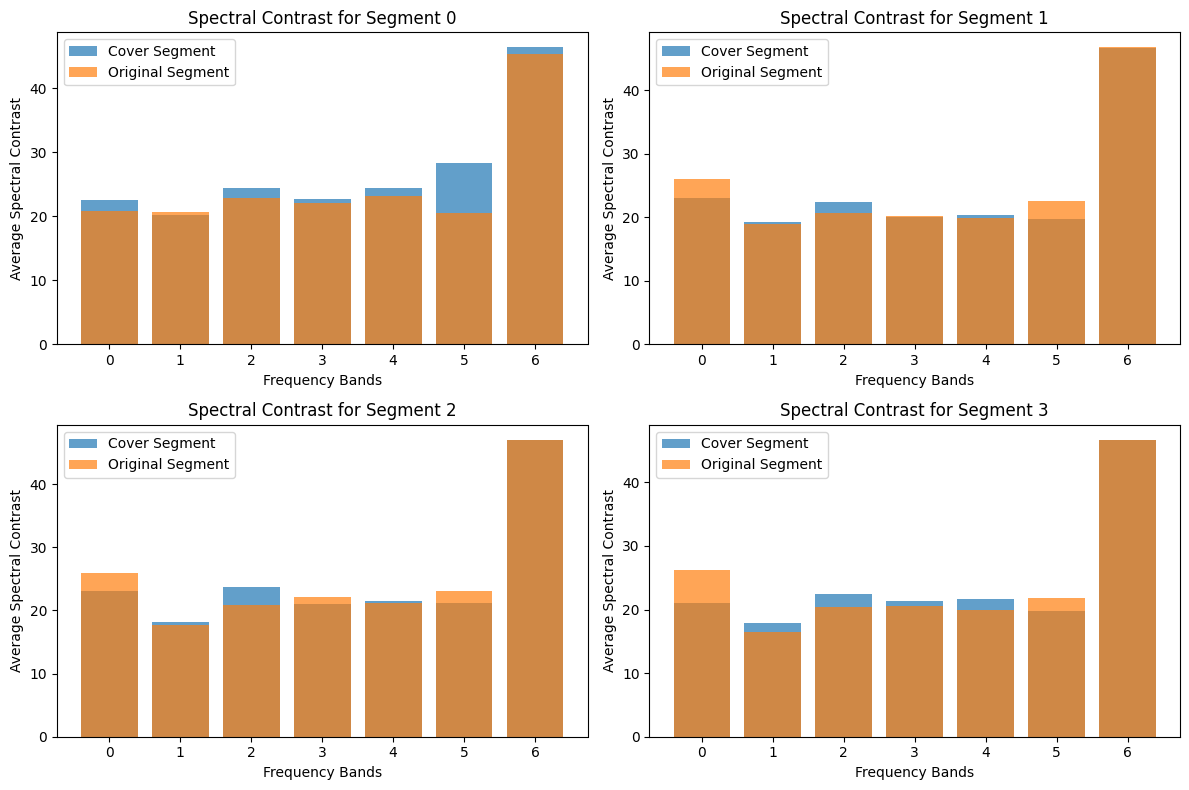

In [312]:
import matplotlib.pyplot as plt

# Number of segments to visualize
num_segments_to_visualize = 4

# Create a grid of subplots (2 rows and 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for i in range(num_segments_to_visualize):
    # Calculate subplot position (row and column)
    row = i // 2
    col = i % 2
    
    # Plot Spectral Contrast for Cover Segment in the appropriate subplot
    ax = axes[row, col]
    ax.bar(range(len(spectral_df['SpectralContrast_cover'].iloc[i])), spectral_df['SpectralContrast_cover'].iloc[i], label='Cover Segment', alpha=0.7)
    ax.bar(range(len(spectral_df['SpectralContrast_original'].iloc[i])), spectral_df['SpectralContrast_original'].iloc[i], label='Original Segment', alpha=0.7)
    ax.set_title(f'Spectral Contrast for Segment {i}')
    ax.set_xlabel('Frequency Bands')
    ax.set_ylabel('Average Spectral Contrast')
    ax.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('../Final Report/spectral-contrast-plot.png')

# Show the subplots (optional)
plt.show()


## 4.4. Temporal Centroid

In [321]:
import numpy as np
import librosa

def extract_zcr(segment, sr=22050, hop_length=512):
    # Compute Zero Crossing Rate
    zcr = librosa.feature.zero_crossing_rate(segment, hop_length=hop_length)[0]
    # Aggregate across time
    zcr_agg = np.mean(zcr)
    return zcr_agg

def calculate_temporal_centroid(segment, sr=22050):
    # Get the magnitude of the STFT
    S, phase = librosa.magphase(librosa.stft(segment))
    # Compute the time vector for each frame
    times = librosa.frames_to_time(range(S.shape[1]), sr=sr)
    # Compute the weighted sum of times (center of mass)
    temporal_centroid = np.sum(times * np.sum(S, axis=0)) / np.sum(S)
    return temporal_centroid

In [322]:
# Create a copy of the DataFrame for Temporal features
temporal_df = segments_df.copy()

# Apply the functions to extract Zero Crossing Rate and Temporal Centroid
temporal_df['ZCR_cover'] = temporal_df['Cover Segment'].apply(extract_zcr)
temporal_df['ZCR_original'] = temporal_df['Original Segment'].apply(extract_zcr)
temporal_df['TemporalCentroid_cover'] = temporal_df['Cover Segment'].apply(calculate_temporal_centroid)
temporal_df['TemporalCentroid_original'] = temporal_df['Original Segment'].apply(calculate_temporal_centroid)

In [324]:
temporal_df.head()

,Cover Segment,Original Segment,Segment Index,Sentiment,ZCR_cover,ZCR_original,TemporalCentroid_cover,TemporalCentroid_original
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,66.992346,0.054979,0.042199,18.241029,19.237387
1,"[0.07490128, 0.094931565, 0.0850826, 0.0915492...","[-0.00032152608, -0.00020002574, 0.010507531, ...",1,66.992346,0.091203,0.065605,16.042381,16.485981
2,"[-0.040957797, -0.115433946, -0.21482903, -0.2...","[0.010473177, 0.008644883, 0.010639019, 0.0136...",2,66.992346,0.090079,0.085289,15.612501,15.324572
3,"[0.118706435, 0.08983742, 0.075636685, 0.07188...","[-0.023031887, -0.042674154, -0.075315416, -0....",3,66.992346,0.100419,0.067301,13.672259,15.196029
4,"[-0.3598705, -0.3553201, -0.29623574, -0.20857...","[-0.013189853, -0.0033766124, 0.0053994665, 0....",4,66.992346,0.085172,0.075376,15.342071,15.213888


Quality check

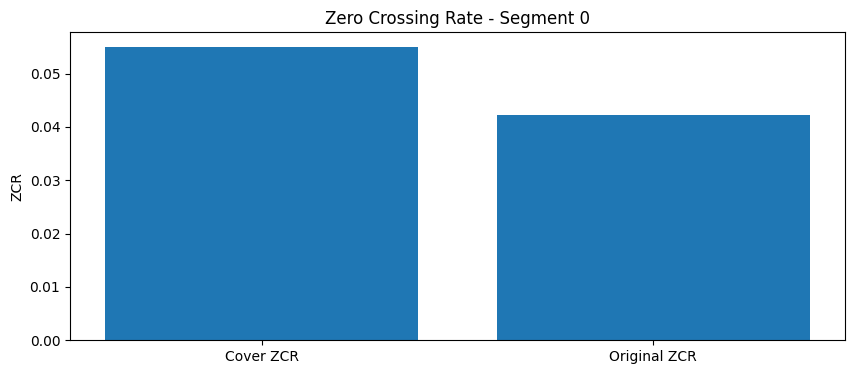

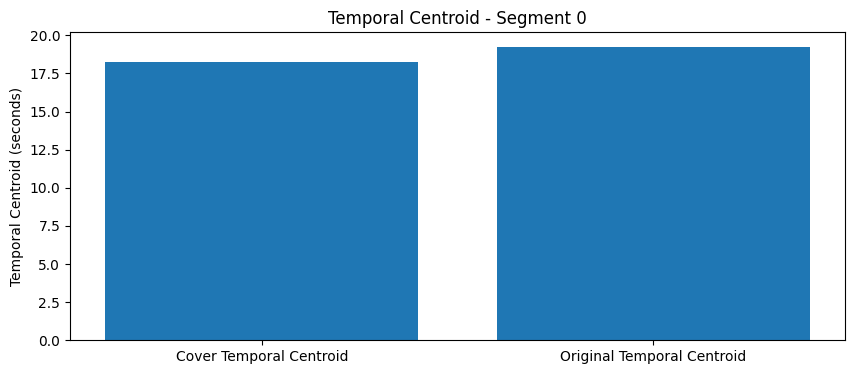

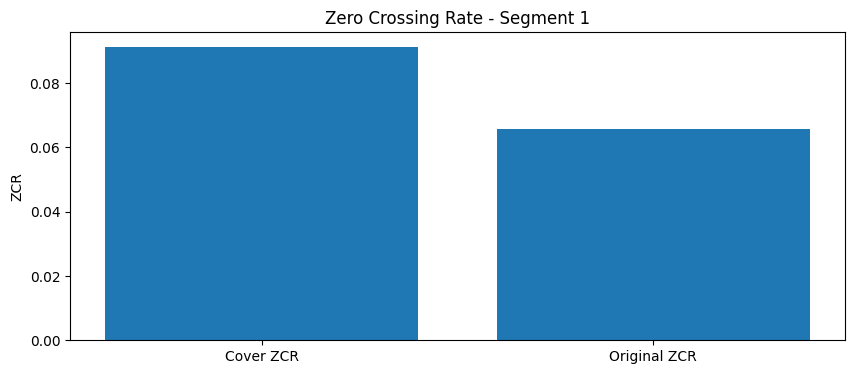

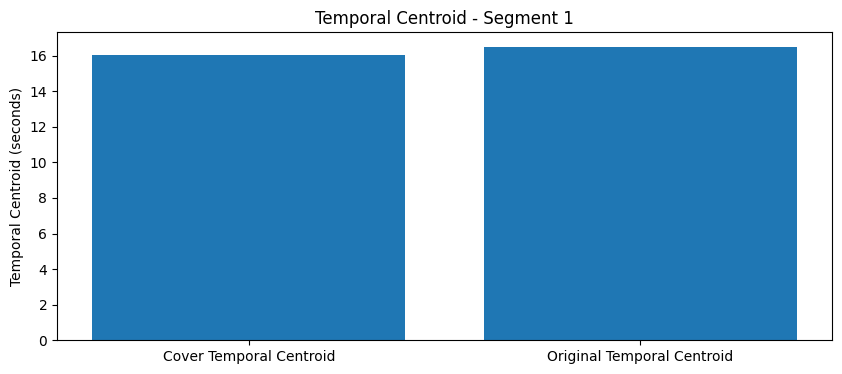

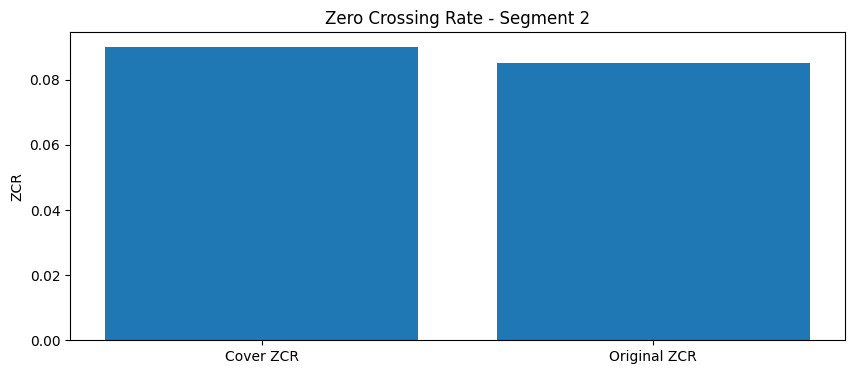

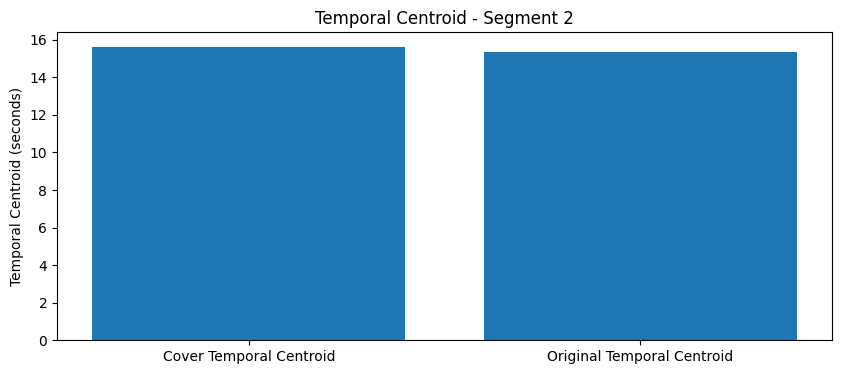

In [326]:
# Number of segments to visualize
num_segments_to_visualize = 3

# Visualize ZCR for the first few segments
for i in range(num_segments_to_visualize):
    plt.figure(figsize=(10, 4))
    plt.bar(['Cover ZCR', 'Original ZCR'], 
            [temporal_df['ZCR_cover'].iloc[i], temporal_df['ZCR_original'].iloc[i]])
    plt.title(f'Zero Crossing Rate - Segment {i}')
    plt.ylabel('ZCR')
    plt.show()

    plt.figure(figsize=(10, 4))
    plt.bar(['Cover Temporal Centroid', 'Original Temporal Centroid'], 
            [temporal_df['TemporalCentroid_cover'].iloc[i], temporal_df['TemporalCentroid_original'].iloc[i]])
    plt.title(f'Temporal Centroid - Segment {i}')
    plt.ylabel('Temporal Centroid (seconds)')
    plt.show()


## 4.5. Cross-Correlation Features

In [339]:
import numpy as np

def extract_cross_correlation(cover_segment, original_segment):
    # Ensure the segments are numpy arrays
    cover_segment = np.array(cover_segment)
    original_segment = np.array(original_segment)

    # Compute normalized cross-correlation
    cross_corr = np.correlate(cover_segment, original_segment, mode='same')
    cross_corr /= (np.linalg.norm(cover_segment) * np.linalg.norm(original_segment))
    
    # Print status
    if index % 100 == 0:
        print(f"Processing segment {index}")
    
    return cross_corr

In [337]:
## Warning: this code takes forever to run

# # Create a copy of the DataFrame for Cross-Correlation features
# crosscorr_df = segments_df.copy()

# # Apply the function to extract Cross-Correlation features for cover and original segments
# crosscorr_df['CrossCorrelation'] = crosscorr_df.apply(lambda row: extract_cross_correlation(row['Cover Segment'], row['Original Segment']), axis=1)

In [340]:
# Try on a subset of data frame

# Randomly sample 25% of the data
subset_df = segments_df.sample(frac=0.25, random_state=42)

# Create a new DataFrame for storing cross-correlation results
crosscorr_subset_df = subset_df.copy()

In [343]:
# still too slow

# Apply the function to the subset
#crosscorr_subset_df['CrossCorrelation'] = crosscorr_subset_df.apply(lambda row: extract_cross_correlation(row['Cover Segment'], row['Original Segment']), axis=1)

## 4.6. Absolulte difference

In [344]:
# Function to calculate the absolute difference
def calculate_absolute_difference(cover_segment, original_segment):
    # Ensure the segments are numpy arrays
    cover_segment = np.array(cover_segment)
    original_segment = np.array(original_segment)

    # Compute the absolute difference
    abs_diff = np.abs(cover_segment - original_segment)
    
    return abs_diff

In [347]:
# Create a new DataFrame for the baseline feature
baseline_df = segments_df.copy()


# Apply the function to calculate absolute difference for each pair of segments
baseline_df['AbsDifference'] = baseline_df.apply(lambda row: calculate_absolute_difference(row['Cover Segment'], row['Original Segment']), axis=1)

baseline_df.head()

,Cover Segment,Original Segment,Segment Index,Sentiment,AbsDifference
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,66.992346,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"[0.07490128, 0.094931565, 0.0850826, 0.0915492...","[-0.00032152608, -0.00020002574, 0.010507531, ...",1,66.992346,"[0.075222805, 0.09513159, 0.07457507, 0.065477..."
2,"[-0.040957797, -0.115433946, -0.21482903, -0.2...","[0.010473177, 0.008644883, 0.010639019, 0.0136...",2,66.992346,"[0.051430974, 0.124078825, 0.22546804, 0.29464..."
3,"[0.118706435, 0.08983742, 0.075636685, 0.07188...","[-0.023031887, -0.042674154, -0.075315416, -0....",3,66.992346,"[0.14173833, 0.13251157, 0.1509521, 0.15127891..."
4,"[-0.3598705, -0.3553201, -0.29623574, -0.20857...","[-0.013189853, -0.0033766124, 0.0053994665, 0....",4,66.992346,"[0.34668064, 0.3519435, 0.3016352, 0.22177273,..."


Quality check

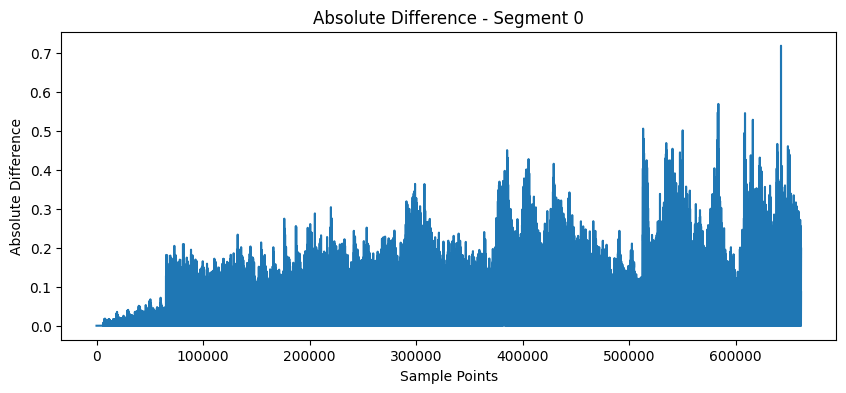

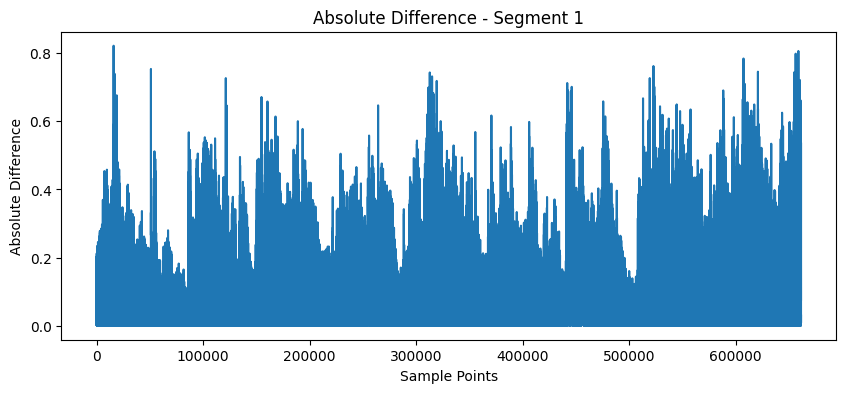

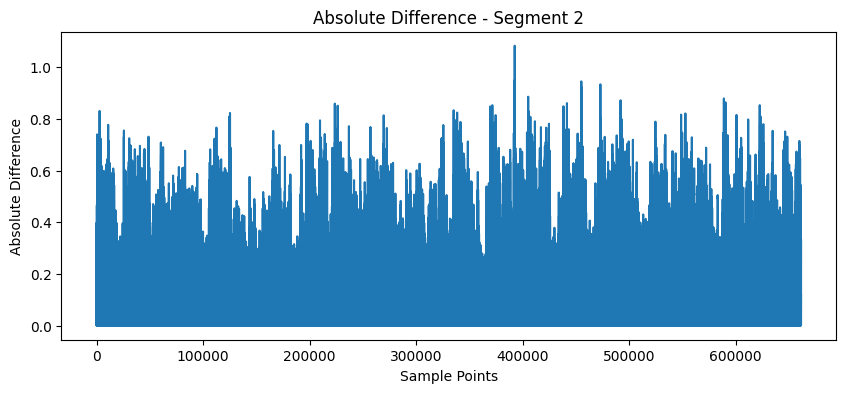

In [348]:
import matplotlib.pyplot as plt

# Number of segments to visualize
num_segments_to_visualize = 3

# Visualize the absolute differences for the first few segments
for i in range(num_segments_to_visualize):
    # Extract the absolute difference for the i-th segment
    abs_diff = baseline_df['AbsDifference'].iloc[i]

    # Plot the absolute difference
    plt.figure(figsize=(10, 4))
    plt.plot(abs_diff)
    plt.title(f'Absolute Difference - Segment {i}')
    plt.xlabel('Sample Points')
    plt.ylabel('Absolute Difference')
    plt.show()

# 5. Model Training for MFCC

In [139]:
# # Prepare data for training
# X = np.array(model_df_no_song_id[['MFCCs_cover', 'MFCCs_original']].tolist())
# y = model_df_no_song_id['sentiment'].values

# # Split into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize and train the model
# model = SGDRegressor(max_iter=1000, tol=1e-3)
# model.fit(X_train, y_train)

# # Evaluate the model
# y_pred = model.predict(X_test)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# print("RMSE: ", rmse)

# # Plot learning curves
# def plot_learning_curves(model, X_train, y_train, X_val, y_val):
#     train_errors, val_errors = [], []
#     for m in range(1, len(X_train)):
#         model.fit(X_train[:m], y_train[:m])
#         y_train_predict = model.predict(X_train[:m])
#         y_val_predict = model.predict(X_val)
#         train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
#         val_errors.append(mean_squared_error(y_val, y_val_predict))
#     plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
#     plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
#     plt.legend()
#     plt.xlabel("Training set size")
#     plt.ylabel("RMSE")
#     plt.title("Learning Curves")

# plot_learning_curves(model, X_train, y_train, X_test, y_test)

In [353]:
# for storing all the MSE and RMSE values

mse_models = []
rmse_models = []

## 5.1. Data preparation, and train-test split for

In [241]:
# import matplotlib.pyplot as plt
# from sklearn.model_selection import learning_curve

# def plot_learning_curve(estimator, X, y, train_sizes=np.linspace(0.1, 1.0, 5), cv=None, n_jobs=None, scoring=None):
#     train_sizes, train_scores, test_scores = learning_curve(
#         estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=scoring)
    
#     train_scores_mean = np.mean(train_scores, axis=1)
#     train_scores_std = np.std(train_scores, axis=1)
#     test_scores_mean = np.mean(test_scores, axis=1)
#     test_scores_std = np.std(test_scores, axis=1)

#     plt.figure()
#     plt.title("Learning Curve")
#     plt.xlabel("Training examples")
#     plt.ylabel("Score")
#     plt.grid()

#     plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.1, color="r")
#     plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.1, color="g")
#     plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
#     plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

#     plt.legend(loc="best")
#     return plt

In [354]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Extracting features and target from the DataFrame
X = np.array(mfcc_df['Combined_MFCCs'].tolist())
y = mfcc_df['Sentiment'].values

# Splitting into training and remaining data
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.3, random_state=42)

# Now split the remaining data into test and validation sets
test_size = 0.5  # Split the remaining data into half test and half validation
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=test_size, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Print shapes to confirm the split
print("X_train shape:", X_train_scaled.shape)
print("X_val shape:", X_val_scaled.shape)
print("X_test shape:", X_test_scaled.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)


X_train shape: (50, 26)
X_val shape: (11, 26)
X_test shape: (11, 26)
y_train shape: (50,)
y_val shape: (11,)
y_test shape: (11,)


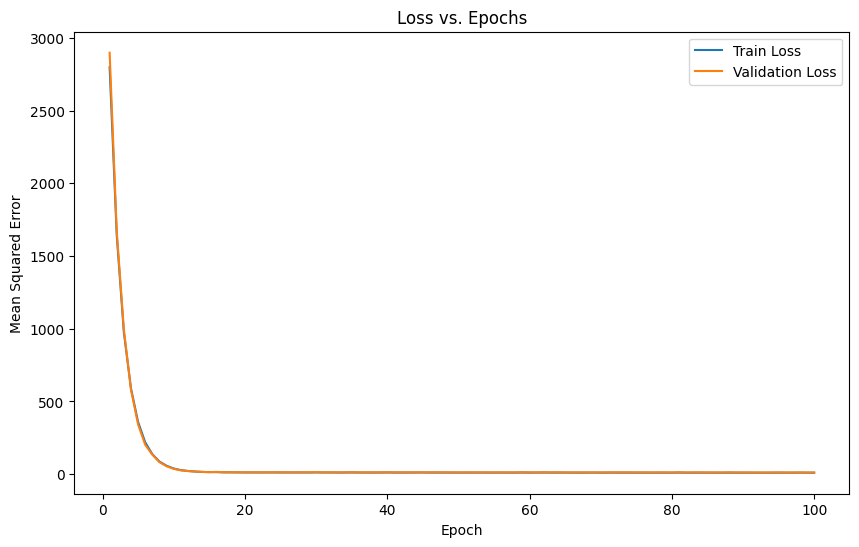

Mean Squared Error: 11.697325553148533
Root Mean Squared Error: 3.420135312110989


In [355]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Initialize the model with warm_start=True for incremental learning
model = SGDRegressor(max_iter=1, warm_start=True, tol=None)

# Lists to store the loss values
train_losses_mfcc = []
val_losses_mfcc = []

# Number of epochs
n_epochs = 100

# Training loop
for epoch in range(n_epochs):
    model.fit(X_train_scaled, y_train)  # Incremental fit
    train_loss = mean_squared_error(y_train, model.predict(X_train_scaled))
    val_loss = mean_squared_error(y_val, model.predict(X_val_scaled))
    train_losses_mfcc.append(train_loss)
    val_losses_mfcc.append(val_loss)

# Plotting the loss vs. epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, n_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Loss vs. Epochs')
plt.legend()
# Save the plot as a PNG file
plt.savefig('../Final Report/loss_vs_epochs-mfcc.png')
plt.show()

# Final prediction after training
y_pred = model.predict(X_test_scaled)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
mse_models.append(mse)
print(f"Mean Squared Error: {mse}")

# Calculate the root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
mse_models.append(rmse)
print(f"Root Mean Squared Error: {rmse}")



In [257]:
# Save the plot as a PNG file
plt.savefig('../Final Report/loss_vs_epochs-mfcc.png')

<Figure size 640x480 with 0 Axes>

In [233]:
# Select the first example from the test set
test_example = X_test_scaled[0].reshape(1, -1)

# Predict sentiment using the trained model
predicted_sentiment = model.predict(test_example)

# Output the predicted sentiment score
print("Predicted Sentiment Score:", predicted_sentiment[0])

Predicted Sentiment Score: 65.96236022385881


Save model

In [251]:
from joblib import dump
import os

# Directory for models
models_dir = 'saved_models'
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

# Model filename with version number
model_filename = 'MFCC_model_v1.joblib'
model_path = os.path.join(models_dir, model_filename)

# Save the model
dump(model, model_path)

['saved_models/MFCC_model_v1.joblib']

# 6. Inference

In [252]:
from joblib import load

models_dir = 'saved_models'

# Load the model from the 'models' directory
model_path = os.path.join(models_dir, 'MFCC_model_v1.joblib')
model = load(model_path)

In [352]:
# TODO: repeat data pre-processing steps for an audio file, including segmentation

# Then use one of the models developed in this project

# 7. Model Training for Chroma Features

In [356]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Combining Chroma features for cover and original into one array
chroma_df['Combined_Chroma'] = chroma_df.apply(lambda row: np.concatenate([row['Chroma_cover'], row['Chroma_original']]), axis=1)

# Preparing feature matrix (X) and target array (y)
X = np.array(chroma_df['Combined_Chroma'].tolist())
y = chroma_df['Sentiment'].values

# Splitting into training and remaining data
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.3, random_state=42)

# Now split the remaining data into test and validation sets
test_size = 0.5  # Split the remaining data into half test and half validation
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=test_size, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Print shapes to confirm the split
print("X_train shape:", X_train_scaled.shape)
print("X_val shape:", X_val_scaled.shape)
print("X_test shape:", X_test_scaled.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

X_train shape: (50, 24)
X_val shape: (11, 24)
X_test shape: (11, 24)
y_train shape: (50,)
y_val shape: (11,)
y_test shape: (11,)


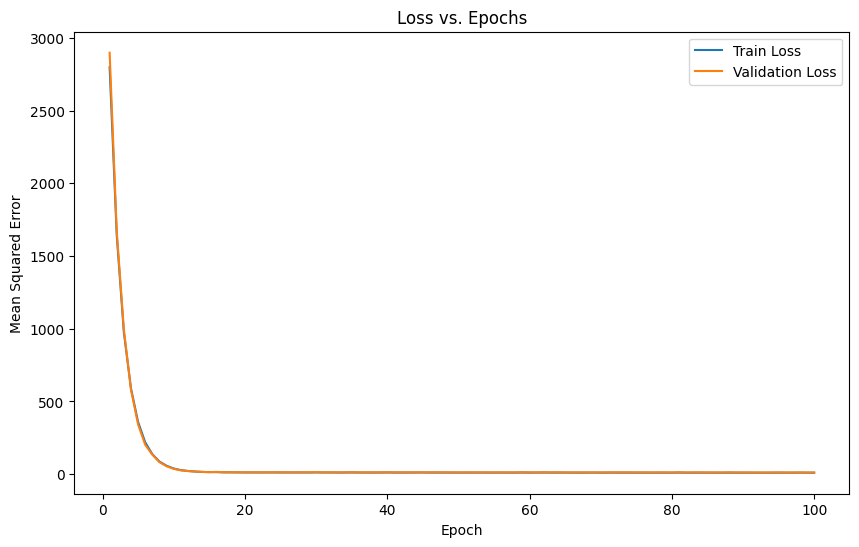

Mean Squared Error: 30.047336178298337
Root Mean Squared Error: 5.481545053933091


In [357]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning)

# Initialize the model with warm_start=True for incremental learning
model = SGDRegressor(max_iter=1, warm_start=True, tol=None)

# Lists to store the loss values
train_losses_chroma = []
val_losses_chroma = []

# Number of epochs
n_epochs = 100

# Training loop
for epoch in range(n_epochs):
    model.fit(X_train_scaled, y_train)  # Incremental fit
    train_loss = mean_squared_error(y_train, model.predict(X_train_scaled))
    val_loss = mean_squared_error(y_val, model.predict(X_val_scaled))
    train_losses_chroma.append(train_loss)
    val_losses_chroma.append(val_loss)

# Plotting the loss vs. epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, n_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

# Final prediction after training
y_pred = model.predict(X_test_scaled)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
mse_models.append(mse)
print(f"Mean Squared Error: {mse}")

# Calculate the root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse_models.append(rmse)
print(f"Root Mean Squared Error: {rmse}")

# 8. Model Training for Spectral Contrast

In [315]:
spectral_df.head()

,Cover Segment,Original Segment,Segment Index,Sentiment,SpectralContrast_cover,SpectralContrast_original
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,66.992346,"[22.51160447457715, 20.142055876154327, 24.440...","[20.764842602590864, 20.686302338830156, 22.90..."
1,"[0.07490128, 0.094931565, 0.0850826, 0.0915492...","[-0.00032152608, -0.00020002574, 0.010507531, ...",1,66.992346,"[23.07200903689596, 19.284440831905993, 22.471...","[26.06591982281666, 18.978247081388837, 20.680..."
2,"[-0.040957797, -0.115433946, -0.21482903, -0.2...","[0.010473177, 0.008644883, 0.010639019, 0.0136...",2,66.992346,"[22.996394170280965, 18.121181334668837, 23.74...","[25.84705658500992, 17.630441780485892, 20.914..."
3,"[0.118706435, 0.08983742, 0.075636685, 0.07188...","[-0.023031887, -0.042674154, -0.075315416, -0....",3,66.992346,"[20.96706257038996, 17.927834351672026, 22.453...","[26.232458291506834, 16.525432966619444, 20.40..."
4,"[-0.3598705, -0.3553201, -0.29623574, -0.20857...","[-0.013189853, -0.0033766124, 0.0053994665, 0....",4,66.992346,"[21.95356115712459, 17.650172697235572, 23.321...","[26.19940449183436, 16.19245330152493, 19.3464..."


In [358]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning

# Combining Spectral Contrast features for cover and original into one array
spectral_df['Combined_Spectral'] = spectral_df.apply(lambda row: np.concatenate([row['SpectralContrast_cover'], row['SpectralContrast_original']]), axis=1)

# Preparing feature matrix (X) and target array (y)
X = np.array(spectral_df['Combined_Spectral'].tolist())
y = spectral_df['Sentiment'].values

# Splitting into training and remaining data
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.3, random_state=42)

# Splitting remaining data into test and validation sets
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Print shapes to confirm the split
print("X_train shape:", X_train_scaled.shape)
print("X_val shape:", X_val_scaled.shape)
print("X_test shape:", X_test_scaled.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)



X_train shape: (50, 14)
X_val shape: (11, 14)
X_test shape: (11, 14)
y_train shape: (50,)
y_val shape: (11,)
y_test shape: (11,)


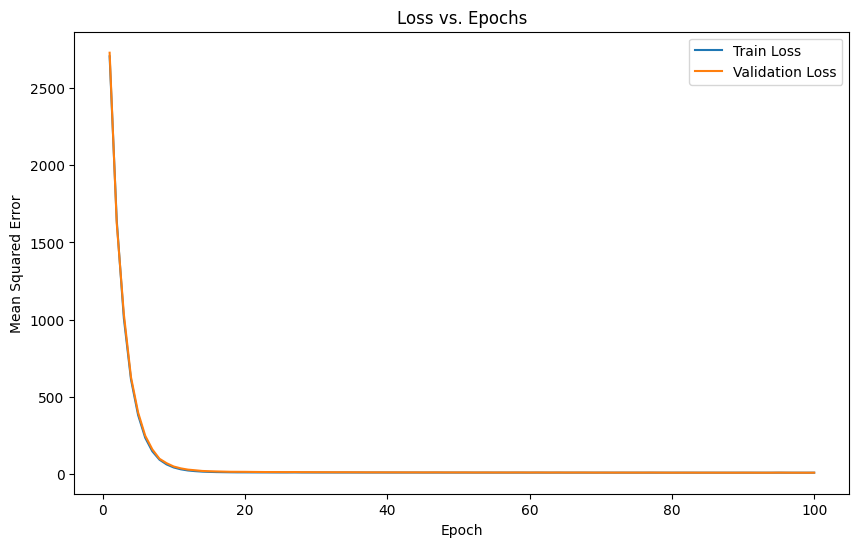

Mean Squared Error: 7.74566944831553
Root Mean Squared Error: 2.783104282687864


In [359]:
# Suppress ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning)

# Initialize the model with warm_start=True for incremental learning
model = SGDRegressor(max_iter=1, warm_start=True, tol=None)

# Lists to store the loss values
train_losses_spectral = []
val_losses_spectral = []

# Number of epochs
n_epochs = 100

# Training loop
for epoch in range(n_epochs):
    model.fit(X_train_scaled, y_train)
    train_loss = mean_squared_error(y_train, model.predict(X_train_scaled))
    val_loss = mean_squared_error(y_val, model.predict(X_val_scaled))
    train_losses_spectral.append(train_loss)
    val_losses_spectral.append(val_loss)

# Plotting the loss vs. epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_epochs + 1), train_losses_spectral, label='Train Loss')
plt.plot(range(1, n_epochs + 1), val_losses_spectral, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

# Final prediction after training
y_pred = model.predict(X_test_scaled)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
mse_models.append(mse)
print(f"Mean Squared Error: {mse}")

# Calculate the root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse_models.append(rmse)
print(f"Root Mean Squared Error: {rmse}")


# 9. Model Training Zero Crossing Rate and Temporal Centroid

In [328]:
temporal_df

,Cover Segment,Original Segment,Segment Index,Sentiment,ZCR_cover,ZCR_original,TemporalCentroid_cover,TemporalCentroid_original,Combined_Temporal
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,66.992346,0.054979,0.042199,18.241029,19.237387,"[0.05497850353134675, 0.042198913385255415, 18..."
1,"[0.07490128, 0.094931565, 0.0850826, 0.0915492...","[-0.00032152608, -0.00020002574, 0.010507531, ...",1,66.992346,0.091203,0.065605,16.042381,16.485981,"[0.09120315221071981, 0.06560504547213622, 16...."
2,"[-0.040957797, -0.115433946, -0.21482903, -0.2...","[0.010473177, 0.008644883, 0.010639019, 0.0136...",2,66.992346,0.090079,0.085289,15.612501,15.324572,"[0.09007882038506192, 0.08528935577109133, 15...."
3,"[0.118706435, 0.08983742, 0.075636685, 0.07188...","[-0.023031887, -0.042674154, -0.075315416, -0....",3,66.992346,0.100419,0.067301,13.672259,15.196029,"[0.10041927184113777, 0.06730080241389319, 13...."
4,"[-0.3598705, -0.3553201, -0.29623574, -0.20857...","[-0.013189853, -0.0033766124, 0.0053994665, 0....",4,66.992346,0.085172,0.075376,15.342071,15.213888,"[0.08517219850522446, 0.07537558351876934, 15...."
...,...,...,...,...,...,...,...,...,...
67,"[-0.49712056, -0.3406962, -0.24150649, -0.1532...","[-0.023031887, -0.042674154, -0.075315416, -0....",3,69.593073,0.091331,0.067301,12.939320,15.196029,"[0.09133051349651702, 0.06730080241389319, 12...."
68,"[0.008208156, -0.04071218, -0.09877376, -0.086...","[-0.013189853, -0.0033766124, 0.0053994665, 0....",4,69.593073,0.068353,0.075376,13.413846,15.213888,"[0.06835332817337461, 0.07537558351876934, 13...."
69,"[-0.030923821, -0.037809893, -0.041856814, -0....","[0.0883402, 0.06749987, 0.022414662, -0.023661...",5,69.593073,0.117958,0.096660,15.482724,15.269363,"[0.11795847039473684, 0.0966600353134675, 15.4..."
70,"[0.26077986, 0.39671013, 0.49544078, 0.5602351...","[0.13940172, 0.12843776, 0.10548313, 0.0852630...",6,69.593073,0.047612,0.067284,13.354159,11.027314,"[0.04761157906830495, 0.06728379571400929, 13...."


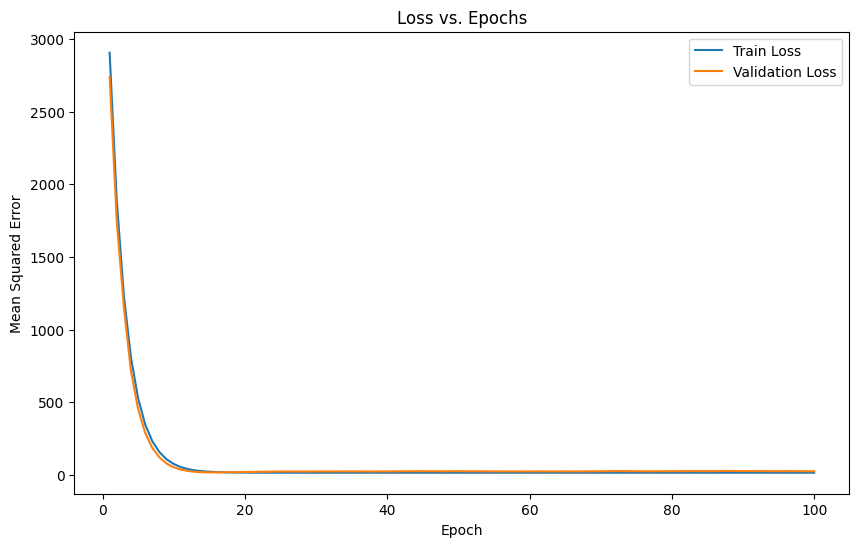

Mean Squared Error: 18.511591979347642
Root Mean Squared Error: 4.302509962724972


In [383]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.exceptions import ConvergenceWarning

# Combining Temporal features for cover and original into one array
temporal_df['Combined_Temporal'] = temporal_df.apply(lambda row: np.array([row['ZCR_cover'], row['ZCR_original'], row['TemporalCentroid_cover'], row['TemporalCentroid_original']]), axis=1)

# Drop rows with NaN values
temporal_df = temporal_df.dropna()

# Preparing feature matrix (X) and target array (y)
X = np.array(temporal_df['Combined_Temporal'].tolist())
y = temporal_df['Sentiment'].values

# Splitting into training and remaining data
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.3, random_state=42)

# Splitting remaining data into test and validation sets
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Suppress ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning)

# Initialize the model with warm_start=True for incremental learning
#model = SGDRegressor(max_iter=1, warm_start=True, tol=None)
model = SGDRegressor(max_iter=1, warm_start=True, tol=1e-3, eta0=0.01, alpha=0.0001)



# Lists to store the loss values
train_losses_temporal = []
val_losses_temporal = []

# Number of epochs
n_epochs = 100

# Training loop
for epoch in range(n_epochs):
    model.fit(X_train_scaled, y_train)
    train_loss = mean_squared_error(y_train, model.predict(X_train_scaled))
    val_loss = mean_squared_error(y_val, model.predict(X_val_scaled))
    train_losses_temporal.append(train_loss)
    val_losses_temporal.append(val_loss)

# Plotting the loss vs. epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_epochs + 1), train_losses_temporal, label='Train Loss')
plt.plot(range(1, n_epochs + 1), val_losses_temporal, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

# Final prediction after training
y_pred = model.predict(X_test_scaled)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
mse_models.append(mse)
print(f"Mean Squared Error: {mse}")

# Calculate the root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse_models.append(rmse)
print(f"Root Mean Squared Error: {rmse}")


# 10. Model training for Absolute Difference

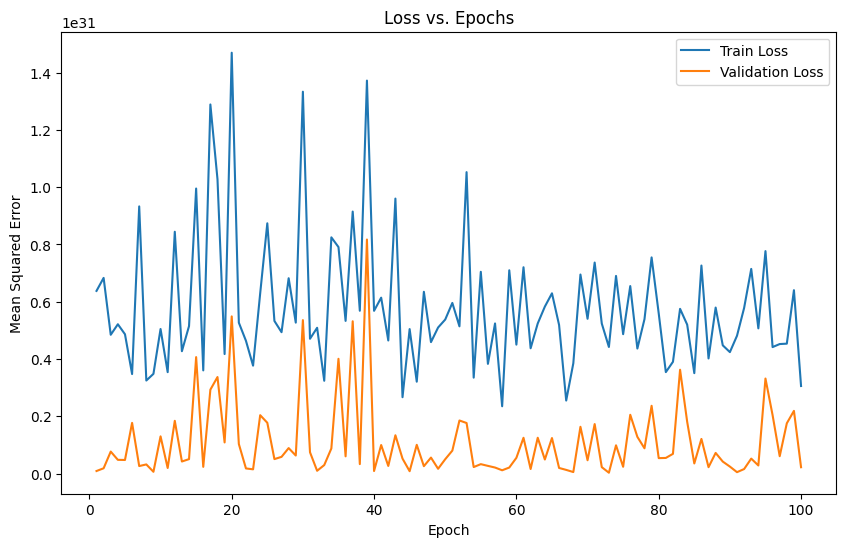

Mean Squared Error: 1.3861652035545831e+29
Root Mean Squared Error: 372312396188279.4


In [361]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.exceptions import ConvergenceWarning

# Combining baseline absolute differences into one array
baseline_df['Combined_Baseline'] = baseline_df['AbsDifference'].apply(np.array)

# Preparing feature matrix (X) and target array (y)
X = np.array(baseline_df['Combined_Baseline'].tolist())
y = baseline_df['Sentiment'].values

# Splitting into training and remaining data
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.3, random_state=42)

# Splitting remaining data into test and validation sets
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Suppress ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning)

# Initialize the model with warm_start=True for incremental learning
model = SGDRegressor(max_iter=1, warm_start=True, tol=None)

# Lists to store the loss values
train_losses_baseline = []
val_losses_baseline = []

# Number of epochs
n_epochs = 100

# Training loop
for epoch in range(n_epochs):
    model.fit(X_train_scaled, y_train)
    train_loss = mean_squared_error(y_train, model.predict(X_train_scaled))
    val_loss = mean_squared_error(y_val, model.predict(X_val_scaled))
    train_losses_baseline.append(train_loss)
    val_losses_baseline.append(val_loss)

# Plotting the loss vs. epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_epochs + 1), train_losses_baseline, label='Train Loss')
plt.plot(range(1, n_epochs + 1), val_losses_baseline, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Loss vs. Epochs')
plt.legend()

# Save the plot as a PNG file
plt.savefig('../Final Report/baseline.png')

plt.show()

# Final prediction after training
y_pred = model.predict(X_test_scaled)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
mse_models.append(mse)
print(f"Mean Squared Error: {mse}")

# Calculate the root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
mse_models.append(rmse)
print(f"Root Mean Squared Error: {rmse}")

# 11. Model comparisons

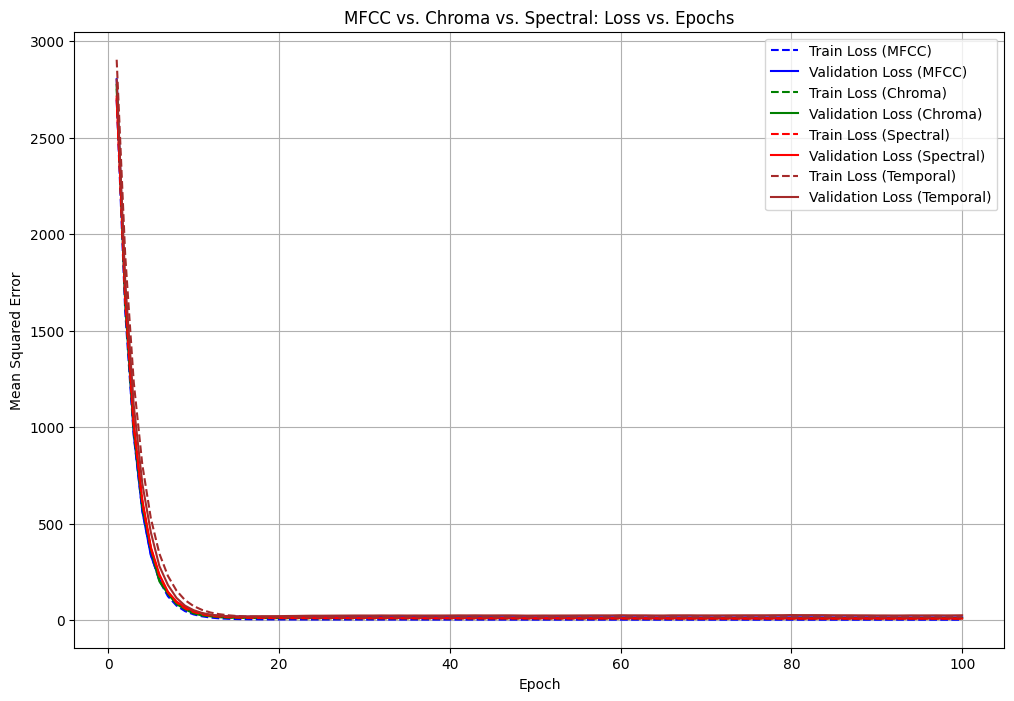

In [332]:
import matplotlib.pyplot as plt

# Plotting the loss vs. epochs for both models
plt.figure(figsize=(12, 8))

# MFCC model losses
plt.plot(range(1, n_epochs + 1), train_losses_mfcc, label='Train Loss (MFCC)', color='blue', linestyle='dashed')
plt.plot(range(1, n_epochs + 1), val_losses_mfcc, label='Validation Loss (MFCC)', color='blue')

# Chroma model losses
plt.plot(range(1, n_epochs + 1), train_losses_chroma, label='Train Loss (Chroma)', color='green', linestyle='dashed')
plt.plot(range(1, n_epochs + 1), val_losses_chroma, label='Validation Loss (Chroma)', color='green')

# Chroma model losses
plt.plot(range(1, n_epochs + 1), train_losses_spectral, label='Train Loss (Spectral)', color='red', linestyle='dashed')
plt.plot(range(1, n_epochs + 1), val_losses_spectral, label='Validation Loss (Spectral)', color='red')

# Temporal model losses
plt.plot(range(1, n_epochs + 1), train_losses_temporal, label='Train Loss (Temporal)', color='brown', linestyle='dashed')
plt.plot(range(1, n_epochs + 1), val_losses_temporal, label='Validation Loss (Temporal)', color='brown')


plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('MFCC vs. Chroma vs. Spectral: Loss vs. Epochs')
plt.legend()
plt.grid(True)
# Save the plot as a PNG file
plt.savefig('../Final Report/loss_vs_epochs_comparison.png')
plt.show()


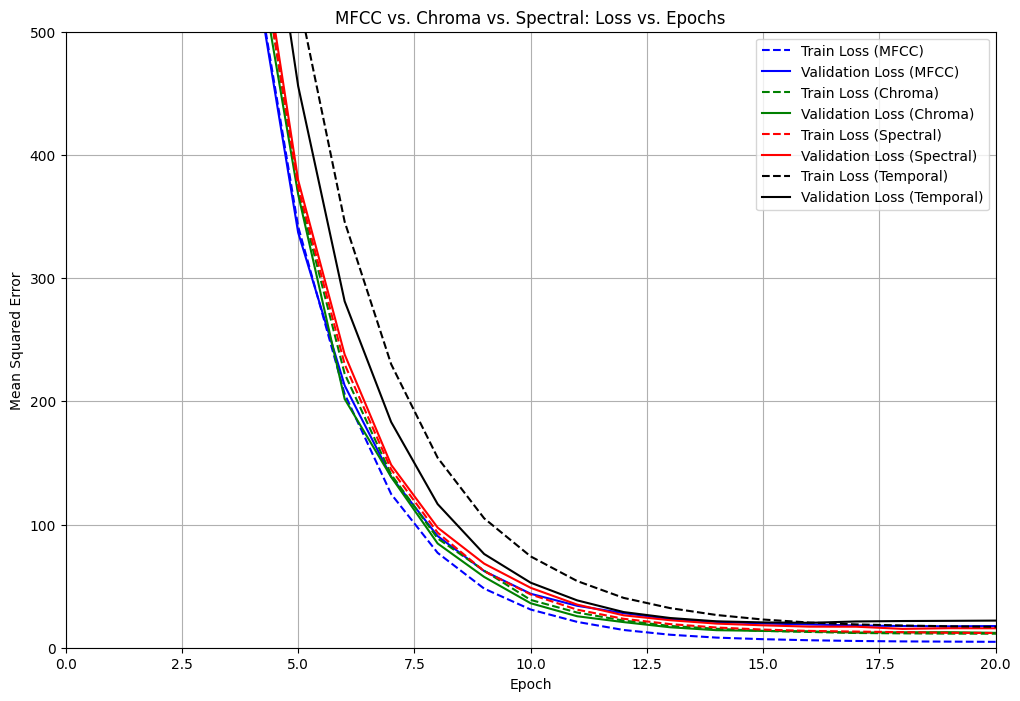

In [351]:
import matplotlib.pyplot as plt

# Plotting the loss vs. epochs for both models
plt.figure(figsize=(12, 8))

# MFCC model losses
plt.plot(range(1, n_epochs + 1), train_losses_mfcc, label='Train Loss (MFCC)', color='blue', linestyle='dashed')
plt.plot(range(1, n_epochs + 1), val_losses_mfcc, label='Validation Loss (MFCC)', color='blue')

# Chroma model losses
plt.plot(range(1, n_epochs + 1), train_losses_chroma, label='Train Loss (Chroma)', color='green', linestyle='dashed')
plt.plot(range(1, n_epochs + 1), val_losses_chroma, label='Validation Loss (Chroma)', color='green')

# Spectral model losses
plt.plot(range(1, n_epochs + 1), train_losses_spectral, label='Train Loss (Spectral)', color='red', linestyle='dashed')
plt.plot(range(1, n_epochs + 1), val_losses_spectral, label='Validation Loss (Spectral)', color='red')

# Temporal model losses
plt.plot(range(1, n_epochs + 1), train_losses_temporal, label='Train Loss (Temporal)', color='black', linestyle='dashed')
plt.plot(range(1, n_epochs + 1), val_losses_temporal, label='Validation Loss (Temporal)', color='black')

# Set y-axis and x-axis limits
plt.ylim(0, 500)
plt.xlim(0, 20)

plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('MFCC vs. Chroma vs. Spectral: Loss vs. Epochs')
plt.legend()
plt.grid(True)

# Save the plot as a PNG file
plt.savefig('../Final Report/loss_vs_epochs_comparison_zoomed.png')
plt.show()


# 12. Summary of RMSE

For report:

In [363]:
rmse_models

[5.481545053933091, 2.783104282687864, 4.211651637069275]

MFCC
Mean Squared Error: 11.697325553148533
Root Mean Squared Error: 3.420135312110989

Chroma
Mean Squared Error: 30.047336178298337
Root Mean Squared Error: 5.481545053933091

Spectral Contrast
Mean Squared Error: 7.74566944831553
Root Mean Squared Error: 2.783104282687864

Temporal
Mean Squared Error: 17.738009512028306
Root Mean Squared Error: 4.211651637069275

Absolute difference
Mean Squared Error: 1.3861652035545831e+29
Root Mean Squared Error: 372312396188279.4

In [364]:
mse_manual = [11.697325553148533, 30.047336178298337, 7.74566944831553, 17.738009512028306, 1.386e29]
rmse_manual = [3.420, 5.482, 2.783, 4.212, 3.723e+14]

In [369]:
import pandas as pd

# Custom formatting function for RMSE column
def format_rmse(value):
    if value == 3.723e14:
        return '{:.3e}'.format(value)  # Display as scientific notation
    else:
        return '{:.3f}'.format(value)  # Display with two decimal places

data_results = {
    "Model": ["MFCC", "Chroma", "Spectral Contrast", "Temporal", "Absolute Difference (baseline)"],
    "RMSE": [3.420, 5.482, 2.783, 4.212, 3.723e14]
}

df_results = pd.DataFrame(data)

# Apply custom formatting to the RMSE column
df_results['RMSE'] = df_results['RMSE'].apply(format_rmse)

# Display the DataFrame
df_results


,Model,RMSE
0,MFCC,3.420
1,Chroma,5.482
2,Spectral Contrast,2.783
3,Temporal,4.212
4,Absolute Difference (baseline),3.723e+14


In [370]:
# output to CSV
file_name = "./report in R/rmse_results.csv"
df_results.to_csv(file_name, index=False)